<a href="https://colab.research.google.com/github/ThitipornJaiaue/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm_bscdpdm23

### 643021266-5 นางสาวธิติพร ใจเอื้อ

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

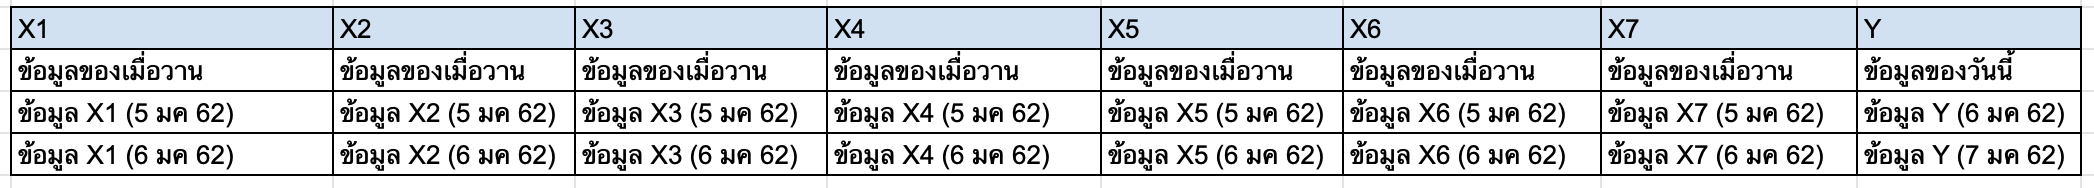

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# เชื่อมบัญชีกับ google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/drive/MyDrive/bsc_dpdm2023/อุตุ')
!pwd #เช็ค path ที่กำลังทำงานอยู่

/content/drive/.shortcut-targets-by-id/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4/อุตุ


In [ ]:
!ls #ในโฟลเดอร์นั้นมีไฟล์อะไรอยู่ในนั้น

'ความกด(เปอร์เซ็นต์)'	 'ความเร็วลม(นอต)'   'ปริมาณฝน(มิลลิเมตร)'	     'อุณหภูมิต่ำสุด(เซลเซียส)'
'ความชื้นสัมพัทธ์(เปอร์เซ็นต์)'  'จำนวนเมฆ(10ส่วน)'  'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'  'อุณหภูมิตุ้มแห้ง(เซลเซียส)'


# เตรียมข้อมูลอุตุนิยมวิทยา

อุตุนิยมวิทยา (Meteorology)

1. Atmospheric pressure = ความกดอากาศ (%) -> pressure

2. Relative Humidity = ความชื้นสัมพัทธ์ (%) -> humidity

3. Wind Speed = ความเร็วลม (นอต) -> wind

4. Cloud Amount = จำนวนเมฆ (10 ส่วน) -> clouds

5. Rainfall = ปริมาณฝน (มิลิเมตร) -> rainfall

6. Dew point temperature = อุณหภูมิจุดน้ำค้าง (เซลเซียส) -> dewpoint

7. Dry-bulb temperature = อุณหภูมิตุ้มแห้ง (เซลเซียส) -> drybulb

8. Minimum degree = อุณหภูมิต่ำสุด (เซลเซียส) -> minimum

จังหวัด

1. ขอนแก่น (Khon Kaen) -> KKN

2. นครพนม (Nakhon Phanom) -> NPM

3. สกลนคร (Sakon Nakhon) -> SNK

4. หนองคาย (Nong Khai)  -> NKI

5. เลย (Loei) -> LEI

# Import data & แก้ Missing

## ความกดอากาศ (%)

In [ ]:
#Atmospheric pressure = ความกดอากาศ (%) -> pressure
# จ.ขอนแก่น = KKN
kkn_pressure = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header = 4)
kkn_pressure.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


In [ ]:
# จ.นครพนม = NPM
npm_pressure = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header = 4)
npm_pressure.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000


In [ ]:
# จ.สกลนคร = SNK
snk_pressure = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header = 4)
snk_pressure.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,-,1010.554000


In [ ]:
# จ.หนองคาย = NKI
nki_pressure = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header = 4)
nki_pressure.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.1,-,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.1,-,1010.214667


In [ ]:
# จ.เลย = LEI
lei_pressure = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx', header = 4)
lei_pressure.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667


### เปลี่ยนชื่อ column

In [ ]:
column_name_pressure = {'Unnamed: 0':'id','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน','Unnamed: 34':'เฉลี่ย'}

In [ ]:
kkn_pressure = kkn_pressure.rename(columns=column_name_pressure)

In [ ]:
kkn_pressure['year'] = kkn_pressure['ปี/เดือน'].dt.year
kkn_pressure['month'] = kkn_pressure['ปี/เดือน'].dt.month
kkn_pressure = kkn_pressure.drop(['ปี/เดือน'], axis =1)
kkn_pressure.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,...,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,...,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,...,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,...,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,...,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667,2012,2


In [ ]:
npm_pressure = npm_pressure.rename(columns=column_name_pressure)

In [ ]:
npm_pressure['year'] = npm_pressure['ปี/เดือน'].dt.year
npm_pressure['month'] = npm_pressure['ปี/เดือน'].dt.month
npm_pressure = npm_pressure.drop(['ปี/เดือน'], axis =1)
npm_pressure.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,1010.68,...,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,1007.38,...,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,1012.96,...,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,1019.57,...,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,1011.78,...,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000,2012,2


In [ ]:
snk_pressure = snk_pressure.rename(columns=column_name_pressure)

In [ ]:
snk_pressure['year'] = snk_pressure['ปี/เดือน'].dt.year
snk_pressure['month'] = snk_pressure['ปี/เดือน'].dt.month
snk_pressure = snk_pressure.drop(['ปี/เดือน'], axis =1)
snk_pressure

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,1010.74,...,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,1007.41,...,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255000,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,1012.82,...,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.470000,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,1019.52,...,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,1011.60,...,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,-,1010.554000,2012,2
5,3,352201-หนองคาย จ.หนองคาย,1011.87,1011.39,1008.88,1007.37,1008.45,1010.70,1010.49,1010.52,...,1010.31,1009.83,1008.81,1008.29,1008.93,1009.38,1012.62,1010.898710,2012,10
6,4,352201-หนองคาย จ.หนองคาย,1013.30,1011.97,1010.91,1010.93,1011.18,1011.66,1010.08,1008.69,...,1011.66,1011.47,1011.38,1010.89,1010.67,1009.88,-,1011.054333,2012,11
7,5,352201-หนองคาย จ.หนองคาย,1010.19,1010.80,1011.88,1011.57,1011.81,1013.40,1012.71,1012.38,...,1014.48,1012.58,1011.33,1010.65,1010.82,1014.19,1016.29,1012.625806,2012,12
8,6,352201-หนองคาย จ.หนองคาย,1015.64,1014.29,1015.26,1014.42,1012.56,1013.52,1013.53,1012.59,...,1013.54,1013.54,1015.37,1017.02,1015.94,1015.75,1016.68,1014.938387,2013,1
9,7,352201-หนองคาย จ.หนองคาย,1015.79,1015.14,1014.60,1014.74,1014.09,1011.73,1008.51,1009.27,...,1012.56,1011.07,1008.70,1007.22,-,-,-,1012.235000,2013,2


In [ ]:
nki_pressure = nki_pressure.rename(columns=column_name_pressure)

In [ ]:
nki_pressure['year'] = nki_pressure['ปี/เดือน'].dt.year
nki_pressure['month'] = nki_pressure['ปี/เดือน'].dt.month
nki_pressure = nki_pressure.drop(['ปี/เดือน'], axis =1)
nki_pressure.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,1010.40,...,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,1007.65,...,1014.65,1013.08,1011.62,1010.21,1010.71,1011.1,-,1012.332333,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,1012.14,...,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,1019.33,...,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,1010.50,...,1005.28,1005.32,1007.59,1006.66,1007.07,1011.1,-,1010.214667,2012,2


In [ ]:
lei_pressure = lei_pressure.rename(columns=column_name_pressure)

In [ ]:
lei_pressure['year'] = lei_pressure['ปี/เดือน'].dt.year
lei_pressure['month'] = lei_pressure['ปี/เดือน'].dt.month
lei_pressure = lei_pressure.drop(['ปี/เดือน'], axis =1)
lei_pressure.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,1010.36,...,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,1007.65,...,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,1012.23,...,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,1018.10,...,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,1009.60,...,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667,2012,2


### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่




In [ ]:
kkn_pressure=kkn_pressure.replace('-',np.NaN)
print(kkn_pressure.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
kkn_pressure.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,...,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.52,1010.350645,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,...,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,NaN,1011.717000,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,...,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.40,1016.470000,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,...,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,...,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,NaN,1009.749667,2012,2


In [ ]:
npm_pressure=npm_pressure.replace('-',np.NaN)
print(npm_pressure.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
npm_pressure.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,1010.68,...,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,1007.38,...,1014.62,1012.80,1011.83,1010.00,1010.60,1011.13,NaN,1012.184667,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,1012.96,...,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,1019.57,...,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.50,1013.510000,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,1011.78,...,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,NaN,1010.608000,2012,2


In [ ]:
snk_pressure=snk_pressure.replace('-',np.NaN)
print(snk_pressure.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_pressure.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,1010.74,...,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,1007.41,...,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,NaN,1012.255000,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,1012.82,...,1019.63,1019.96,1017.56,1017.02,1015.80,1016.96,1017.63,1016.470000,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,1019.52,...,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,1011.60,...,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,NaN,1010.554000,2012,2


In [ ]:
nki_pressure=nki_pressure.replace('-',np.NaN)
print(nki_pressure.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
nki_pressure.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,1010.40,...,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,1007.65,...,1014.65,1013.08,1011.62,1010.21,1010.71,1011.10,NaN,1012.332333,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,1012.14,...,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,1019.33,...,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,1010.50,...,1005.28,1005.32,1007.59,1006.66,1007.07,1011.10,NaN,1010.214667,2012,2


In [ ]:
lei_pressure=lei_pressure.replace('-',np.NaN)
print(lei_pressure.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_pressure.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,1010.36,...,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,1007.65,...,1014.36,1013.30,1011.92,1009.86,1010.10,1010.43,NaN,1012.078333,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,1012.23,...,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,1018.10,...,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.40,1012.367419,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,1009.60,...,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,NaN,1009.516667,2012,2


### แก้ Missing โดยการแทนค่า



In [ ]:
#kkn_pressure[kkn_pressure['...'].isnull()]

In [ ]:
for i in range(len(kkn_pressure['id'])):kkn_pressure.iloc[i,:]=kkn_pressure.iloc[i,:].fillna(kkn_pressure.iloc[i]['เฉลี่ย'])
for i in range(len(npm_pressure['id'])):npm_pressure.iloc[i,:]=npm_pressure.iloc[i,:].fillna(npm_pressure.iloc[i]['เฉลี่ย'])
for i in range(len(snk_pressure['id'])):snk_pressure.iloc[i,:]=snk_pressure.iloc[i,:].fillna(snk_pressure.iloc[i]['เฉลี่ย'])
for i in range(len(nki_pressure['id'])):nki_pressure.iloc[i,:]=nki_pressure.iloc[i,:].fillna(nki_pressure.iloc[i]['เฉลี่ย'])
for i in range(len(lei_pressure['id'])):lei_pressure.iloc[i,:]=lei_pressure.iloc[i,:].fillna(lei_pressure.iloc[i]['เฉลี่ย'])
# แทนค่า Missing Value ด้วยค่าเฉลี่ย ของแต่ row

In [ ]:
kkn_pressure=kkn_pressure.replace('-',np.NaN)
print(kkn_pressure.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
kkn_pressure.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,...,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.520000,1010.350645,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,...,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,1011.717000,1011.717000,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,...,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.400000,1016.470000,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,...,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.520000,1012.484516,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,...,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,1009.749667,1009.749667,2012,2


## ความชื้นสัมพัทธ์ (%)

In [ ]:
# Relative Humidity = ความชื้นสัมพัทธ์ (%) -> humidity
# จ.ขอนแก่น = KKN
kkn_humidity = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header = 4)
kkn_humidity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


In [ ]:
# จ.นครพนม = NPM
npm_humidity = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header = 4)
npm_humidity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72,70,69,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66,65,-,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63,66,70,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61,59,62,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69,-,-,65


In [ ]:
# จ.สกลนคร = SNK
snk_humidity = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header = 4)
snk_humidity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,87,88,77,75,87,86,81,...,74,73,73,72,72,70,74,73,72,78
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,71,71,71,72,73,70,75,...,68,66,71,71,70,70,69,69,-,70
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,66,61,64,67,70,73,72,...,69,65,64,62,69,69,69,69,68,6
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,67,69,66,63,65,67,65,...,75,72,67,72,73,71,64,64,62,72
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,66,70,67,69,73,64,60,...,55,53,55,64,69,74,71,-,-,64


In [ ]:
# จ.หนองคาย = NKI
nki_humidity = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header = 4)
nki_humidity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70,66,68,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71,69,-,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70,67,68,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65,68,73,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69,-,-,69


In [ ]:
# จ.เลย = LEI
lei_humidity = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx', header = 4)
lei_humidity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70,-,-,73


### เปลี่ยนชื่อ column

In [ ]:
column_name_humidity = {'Unnamed: 0':'id','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน','Unnamed: 34':'เฉลี่ย'}

In [ ]:
kkn_humidity = kkn_humidity.rename(columns=column_name_humidity)

In [ ]:
kkn_humidity['year'] = kkn_humidity['ปี/เดือน'].dt.year
kkn_humidity['month'] = kkn_humidity['ปี/เดือน'].dt.month
kkn_humidity = kkn_humidity.drop(['ปี/เดือน'], axis =1)
kkn_humidity.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,83,92,86,80,86,86,83,82,...,73,69,69,75,71,71,68,79,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,71,65,68,65,65,68,69,69,...,65,67,68,67,67,65,-,68,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,66,61,61,62,61,60,69,68,...,60,60,62,65,66,63,64,63,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,65,66,69,63,64,68,65,62,...,75,71,75,69,70,67,68,69,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,71,72,71,72,70,68,61,69,...,48,57,71,73,68,-,-,65,2012,2


In [ ]:
npm_humidity = npm_humidity.rename(columns=column_name_humidity)

In [ ]:
npm_humidity['year'] = npm_humidity['ปี/เดือน'].dt.year
npm_humidity['month'] = npm_humidity['ปี/เดือน'].dt.month
npm_humidity = npm_humidity.drop(['ปี/เดือน'], axis =1)
npm_humidity.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,357201-นครพนม จ.นครพนม,95,84,74,72,87,88,81,82,...,70,69,71,66,72,70,69,77,2011,10
1,2,357201-นครพนม จ.นครพนม,69,67,70,68,71,68,73,72,...,70,78,74,69,66,65,-,69,2011,11
2,3,357201-นครพนม จ.นครพนม,64,56,62,67,69,77,73,68,...,60,61,70,71,63,66,70,65,2011,12
3,1,357201-นครพนม จ.นครพนม,71,70,64,59,68,69,66,67,...,62,67,74,71,61,59,62,71,2012,1
4,2,357201-นครพนม จ.นครพนม,68,69,66,71,71,71,64,61,...,64,64,68,76,69,-,-,65,2012,2


In [ ]:
snk_humidity = snk_humidity.rename(columns=column_name_humidity)

In [ ]:
snk_humidity['year'] = snk_humidity['ปี/เดือน'].dt.year
snk_humidity['month'] = snk_humidity['ปี/เดือน'].dt.month
snk_humidity = snk_humidity.drop(['ปี/เดือน'], axis =1)
snk_humidity.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,356201-สกลนคร จ.สกลนคร,87,88,77,75,87,86,81,77,...,73,72,72,70,74,73,72,78,2011,10
1,2,356201-สกลนคร จ.สกลนคร,71,71,71,72,73,70,75,68,...,71,71,70,70,69,69,-,70,2011,11
2,3,356201-สกลนคร จ.สกลนคร,66,61,64,67,70,73,72,71,...,64,62,69,69,69,69,68,6,2011,12
3,1,356201-สกลนคร จ.สกลนคร,67,69,66,63,65,67,65,69,...,67,72,73,71,64,64,62,72,2012,1
4,2,356201-สกลนคร จ.สกลนคร,66,70,67,69,73,64,60,64,...,55,64,69,74,71,-,-,64,2012,2


In [ ]:
nki_humidity = nki_humidity.rename(columns=column_name_humidity)

In [ ]:
nki_humidity['year'] = nki_humidity['ปี/เดือน'].dt.year
nki_humidity['month'] = nki_humidity['ปี/เดือน'].dt.month
nki_humidity = nki_humidity.drop(['ปี/เดือน'], axis =1)
nki_humidity.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,89,91,78,75,90,88,87,74,...,68,71,70,71,70,66,68,76,2011,10
1,2,352201-หนองคาย จ.หนองคาย,68,66,66,67,68,69,68,73,...,65,67,68,69,71,69,-,68,2011,11
2,3,352201-หนองคาย จ.หนองคาย,67,62,66,66,65,68,71,67,...,61,58,67,71,70,67,68,65,2011,12
3,1,352201-หนองคาย จ.หนองคาย,67,70,68,65,73,68,66,69,...,71,68,71,69,65,68,73,70,2012,1
4,2,352201-หนองคาย จ.หนองคาย,68,71,91,79,78,71,67,69,...,61,62,69,76,69,-,-,69,2012,2


In [ ]:
lei_humidity = lei_humidity.rename(columns=column_name_humidity)

In [ ]:
lei_humidity['year'] = lei_humidity['ปี/เดือน'].dt.year
lei_humidity['month'] = lei_humidity['ปี/เดือน'].dt.month
lei_humidity = lei_humidity.drop(['ปี/เดือน'], axis =1)
lei_humidity.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,90,95,92,89,86,94,90,88,...,83,84,85,85,82,83,85,87,2011,10
1,2,353301-เลย สกษ. จ.เลย,85,83,84,83,83,85,83,82,...,80,81,80,84,82,79,-,82,2011,11
2,3,353301-เลย สกษ. จ.เลย,80,77,77,76,78,83,82,79,...,75,74,80,80,78,81,78,77,2011,12
3,1,353301-เลย สกษ. จ.เลย,75,78,81,79,73,77,82,78,...,83,79,80,78,77,82,79,78,2012,1
4,2,353301-เลย สกษ. จ.เลย,79,81,91,84,78,73,69,71,...,68,67,76,73,70,-,-,73,2012,2


### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [ ]:
kkn_humidity=kkn_humidity.replace('-',np.NaN)
print(kkn_humidity.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
kkn_humidity.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,83,92,86,80,86,86,83,82,...,73,69,69,75,71.0,71.0,68.0,79,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,71,65,68,65,65,68,69,69,...,65,67,68,67,67.0,65.0,NaN,68,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,66,61,61,62,61,60,69,68,...,60,60,62,65,66.0,63.0,64.0,63,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,65,66,69,63,64,68,65,62,...,75,71,75,69,70.0,67.0,68.0,69,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,71,72,71,72,70,68,61,69,...,48,57,71,73,68.0,NaN,NaN,65,2012,2


In [ ]:
npm_humidity=npm_humidity.replace('-',np.NaN)
print(npm_humidity.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
npm_humidity.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,357201-นครพนม จ.นครพนม,95,84,74,72,87,88,81,82,...,70,69,71,66,72.0,70.0,69.0,77,2011,10
1,2,357201-นครพนม จ.นครพนม,69,67,70,68,71,68,73,72,...,70,78,74,69,66.0,65.0,NaN,69,2011,11
2,3,357201-นครพนม จ.นครพนม,64,56,62,67,69,77,73,68,...,60,61,70,71,63.0,66.0,70.0,65,2011,12
3,1,357201-นครพนม จ.นครพนม,71,70,64,59,68,69,66,67,...,62,67,74,71,61.0,59.0,62.0,71,2012,1
4,2,357201-นครพนม จ.นครพนม,68,69,66,71,71,71,64,61,...,64,64,68,76,69.0,NaN,NaN,65,2012,2


In [ ]:
snk_humidity=snk_humidity.replace('-',np.NaN)
print(snk_humidity.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_humidity.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,356201-สกลนคร จ.สกลนคร,87,88,77,75,87,86,81,77,...,73,72,72,70,74.0,73.0,72.0,78,2011,10
1,2,356201-สกลนคร จ.สกลนคร,71,71,71,72,73,70,75,68,...,71,71,70,70,69.0,69.0,NaN,70,2011,11
2,3,356201-สกลนคร จ.สกลนคร,66,61,64,67,70,73,72,71,...,64,62,69,69,69.0,69.0,68.0,6,2011,12
3,1,356201-สกลนคร จ.สกลนคร,67,69,66,63,65,67,65,69,...,67,72,73,71,64.0,64.0,62.0,72,2012,1
4,2,356201-สกลนคร จ.สกลนคร,66,70,67,69,73,64,60,64,...,55,64,69,74,71.0,NaN,NaN,64,2012,2


In [ ]:
nki_humidity=nki_humidity.replace('-',np.NaN)
print(nki_humidity.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
nki_humidity.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,89,91,78,75,90,88,87,74,...,68,71,70,71,70.0,66.0,68.0,76,2011,10
1,2,352201-หนองคาย จ.หนองคาย,68,66,66,67,68,69,68,73,...,65,67,68,69,71.0,69.0,NaN,68,2011,11
2,3,352201-หนองคาย จ.หนองคาย,67,62,66,66,65,68,71,67,...,61,58,67,71,70.0,67.0,68.0,65,2011,12
3,1,352201-หนองคาย จ.หนองคาย,67,70,68,65,73,68,66,69,...,71,68,71,69,65.0,68.0,73.0,70,2012,1
4,2,352201-หนองคาย จ.หนองคาย,68,71,91,79,78,71,67,69,...,61,62,69,76,69.0,NaN,NaN,69,2012,2


In [ ]:
lei_humidity=lei_humidity.replace('-',np.NaN)
print(lei_humidity.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_humidity.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,90,95,92,89,86,94,90,88,...,83,84,85,85,82.0,83.0,85.0,87,2011,10
1,2,353301-เลย สกษ. จ.เลย,85,83,84,83,83,85,83,82,...,80,81,80,84,82.0,79.0,NaN,82,2011,11
2,3,353301-เลย สกษ. จ.เลย,80,77,77,76,78,83,82,79,...,75,74,80,80,78.0,81.0,78.0,77,2011,12
3,1,353301-เลย สกษ. จ.เลย,75,78,81,79,73,77,82,78,...,83,79,80,78,77.0,82.0,79.0,78,2012,1
4,2,353301-เลย สกษ. จ.เลย,79,81,91,84,78,73,69,71,...,68,67,76,73,70.0,NaN,NaN,73,2012,2


### แก้ Missing โดยการแทนค่า


In [ ]:
for i in range(len(kkn_humidity['id'])):kkn_humidity.iloc[i,:]=kkn_humidity.iloc[i,:].fillna(kkn_humidity.iloc[i]['เฉลี่ย'])
for i in range(len(npm_humidity['id'])):npm_humidity.iloc[i,:]=npm_humidity.iloc[i,:].fillna(npm_humidity.iloc[i]['เฉลี่ย'])
for i in range(len(snk_humidity['id'])):snk_humidity.iloc[i,:]=snk_humidity.iloc[i,:].fillna(snk_humidity.iloc[i]['เฉลี่ย'])
for i in range(len(nki_humidity['id'])):nki_humidity.iloc[i,:]=nki_humidity.iloc[i,:].fillna(nki_humidity.iloc[i]['เฉลี่ย'])
for i in range(len(lei_humidity['id'])):lei_humidity.iloc[i,:]=lei_humidity.iloc[i,:].fillna(lei_humidity.iloc[i]['เฉลี่ย'])
# แทนค่า Missing Value ด้วยค่าเฉลี่ย ของแต่ row

In [ ]:
lei_humidity=lei_humidity.replace('-',np.NaN)
print(lei_humidity.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_humidity.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,90,95,92,89,86,94,90,88,...,83,84,85,85,82.0,83.0,85.0,87,2011,10
1,2,353301-เลย สกษ. จ.เลย,85,83,84,83,83,85,83,82,...,80,81,80,84,82.0,79.0,82.0,82,2011,11
2,3,353301-เลย สกษ. จ.เลย,80,77,77,76,78,83,82,79,...,75,74,80,80,78.0,81.0,78.0,77,2011,12
3,1,353301-เลย สกษ. จ.เลย,75,78,81,79,73,77,82,78,...,83,79,80,78,77.0,82.0,79.0,78,2012,1
4,2,353301-เลย สกษ. จ.เลย,79,81,91,84,78,73,69,71,...,68,67,76,73,70.0,73.0,73.0,73,2012,2


## ความเร็วลม (นอต)

In [ ]:
# Wind Speed = ความเร็วลม (นอต) -> wind
# จ.ขอนแก่น = KKN
kkn_wind = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx', header = 4)
kkn_wind.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


In [ ]:
# จ.นครพนม = NPM
npm_wind = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx', header = 4)
npm_wind.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,2,3,3,...,4,1,5,1,1,1,4,5,4,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0,0,1,1,...,1,2,2,3,3,3,1,2,-,2.200000


In [ ]:
# จ.สกลนคร = SNK
snk_wind = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx', header = 4)
snk_wind.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333


In [ ]:
# จ.หนองคาย = NKI
nki_wind = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx', header = 4)
nki_wind.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,4,4,2,1,3,1,...,2,2,3,3,3,3,3,3,4,2.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,3,3,3,2,2,1,2,...,7,4,2,3,2,2,2,2,-,2.433333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,5,3,2,2,2,2,...,3,6,5,4,2,2,2,3,2,3.161290
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333


In [ ]:
# จ.เลย = LEI
lei_wind = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx', header = 4)
lei_wind.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3,2,1,...,1,1,2,2,1,2,2,2,1,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2,2,2,...,3,2,1,1,2,1,2,1,-,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1,2,1,...,1,2,3,2,1,2,1,2,2,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2,2,2,...,2,1,3,2,2,2,2,1,1,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1,2,1,...,1,1,1,1,3,4,2,1,-,1.700000


### เปลี่ยนชื่อ column

In [ ]:
column_name_wind = {'Unnamed: 0':'id','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน','Unnamed: 34':'เฉลี่ย'}

In [ ]:
kkn_wind = kkn_wind.rename(columns=column_name_wind)

In [ ]:
kkn_wind['year'] = kkn_wind['ปี/เดือน'].dt.year
kkn_wind['month'] = kkn_wind['ปี/เดือน'].dt.month
kkn_wind = kkn_wind.drop(['ปี/เดือน'], axis =1)
kkn_wind.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,3,2,3,2,2,3,4,3,...,5,5,5,4,6,4,5,3.354839,2011,10
1,2,353301-เลย สกษ. จ.เลย,4,5,3,3,5,2,3,3,...,5,5,3,1,3,3,-,3.466667,2011,11
2,3,353301-เลย สกษ. จ.เลย,3,4,4,4,4,4,4,4,...,7,6,5,4,4,6,5,4.806452,2011,12
3,1,353301-เลย สกษ. จ.เลย,4,2,1,4,4,2,4,6,...,4,2,2,1,3,4,4,3.129032,2012,1
4,2,353301-เลย สกษ. จ.เลย,2,2,3,2,3,1,2,3,...,3,2,4,3,3,3,-,2.566667,2012,2


In [ ]:
npm_wind = npm_wind.rename(columns=column_name_wind)

In [ ]:
npm_wind['year'] = npm_wind['ปี/เดือน'].dt.year
npm_wind['month'] = npm_wind['ปี/เดือน'].dt.month
npm_wind = npm_wind.drop(['ปี/เดือน'], axis =1)
npm_wind.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,1,1,2,2,1,0,2,1,...,2,1,2,2,1,1,1,1.322581,2011,10
1,2,353301-เลย สกษ. จ.เลย,1,1,1,1,1,1,1,1,...,2,2,1,1,1,1,-,1.200000,2011,11
2,3,353301-เลย สกษ. จ.เลย,1,2,2,1,1,1,1,2,...,3,1,2,1,1,2,2,1.741935,2011,12
3,1,353301-เลย สกษ. จ.เลย,2,2,3,5,2,3,3,4,...,5,1,1,1,4,5,4,2.448276,2012,1
4,2,353301-เลย สกษ. จ.เลย,1,3,4,0,0,1,1,4,...,2,3,3,3,1,2,-,2.200000,2012,2


In [ ]:
snk_wind = snk_wind.rename(columns=column_name_wind)

In [ ]:
snk_wind['year'] = snk_wind['ปี/เดือน'].dt.year
snk_wind['month'] = snk_wind['ปี/เดือน'].dt.month
snk_wind = snk_wind.drop(['ปี/เดือน'], axis =1)
snk_wind.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,1,1,2,2,1,0,2,1,...,2,1,2,2,1,1,1,1.322581,2011,10
1,2,353301-เลย สกษ. จ.เลย,1,1,1,1,1,1,1,1,...,2,2,1,1,1,1,-,1.200000,2011,11
2,3,353301-เลย สกษ. จ.เลย,1,2,2,1,1,1,1,2,...,3,1,2,1,1,2,2,1.741935,2011,12
3,1,353301-เลย สกษ. จ.เลย,2,2,3,5,3,2,4,3,...,5,3,2,3,3,3,4,2.870968,2012,1
4,2,353301-เลย สกษ. จ.เลย,2,3,4,2,1,2,2,3,...,1,3,7,5,3,2,-,2.733333,2012,2


In [ ]:
nki_wind = nki_wind.rename(columns=column_name_wind)

In [ ]:
nki_wind['year'] = nki_wind['ปี/เดือน'].dt.year
nki_wind['month'] = nki_wind['ปี/เดือน'].dt.month
nki_wind = nki_wind.drop(['ปี/เดือน'], axis =1)
nki_wind.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,1,4,4,2,1,3,1,2,...,3,3,3,3,3,3,4,2.580645,2011,10
1,2,353301-เลย สกษ. จ.เลย,3,3,3,2,2,1,2,3,...,2,3,2,2,2,2,-,2.433333,2011,11
2,3,353301-เลย สกษ. จ.เลย,2,5,3,2,2,2,2,4,...,5,4,2,2,2,3,2,3.161290,2011,12
3,1,353301-เลย สกษ. จ.เลย,2,2,3,5,3,2,4,3,...,5,3,2,3,3,3,4,2.870968,2012,1
4,2,353301-เลย สกษ. จ.เลย,2,3,4,2,1,2,2,3,...,1,3,7,5,3,2,-,2.733333,2012,2


In [ ]:
lei_wind = lei_wind.rename(columns=column_name_wind)

In [ ]:
lei_wind['year'] = lei_wind['ปี/เดือน'].dt.year
lei_wind['month'] = lei_wind['ปี/เดือน'].dt.month
lei_wind = lei_wind.drop(['ปี/เดือน'], axis =1)
lei_wind.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,2,2,3,2,3,2,1,1,...,2,2,1,2,2,2,1,1.612903,2011,10
1,2,353301-เลย สกษ. จ.เลย,1,2,1,1,2,2,2,2,...,1,1,2,1,2,1,-,1.700000,2011,11
2,3,353301-เลย สกษ. จ.เลย,2,2,3,2,1,2,1,1,...,3,2,1,2,1,2,2,1.870968,2011,12
3,1,353301-เลย สกษ. จ.เลย,2,2,1,2,2,2,2,2,...,3,2,2,2,2,1,1,1.838710,2012,1
4,2,353301-เลย สกษ. จ.เลย,1,2,2,1,1,2,1,2,...,1,1,3,4,2,1,-,1.700000,2012,2


### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่


In [ ]:
kkn_wind=kkn_wind.replace('-',np.NaN)
print(kkn_wind.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
kkn_wind.head()

id        False
สถานี     False
1         False
2         False
3          True
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21         True
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,3,2,3.0,2,2,3,4,3,...,5,5,5,4,6.0,4.0,5.0,3.354839,2011,10
1,2,353301-เลย สกษ. จ.เลย,4,5,3.0,3,5,2,3,3,...,5,5,3,1,3.0,3.0,NaN,3.466667,2011,11
2,3,353301-เลย สกษ. จ.เลย,3,4,4.0,4,4,4,4,4,...,7,6,5,4,4.0,6.0,5.0,4.806452,2011,12
3,1,353301-เลย สกษ. จ.เลย,4,2,1.0,4,4,2,4,6,...,4,2,2,1,3.0,4.0,4.0,3.129032,2012,1
4,2,353301-เลย สกษ. จ.เลย,2,2,3.0,2,3,1,2,3,...,3,2,4,3,3.0,3.0,NaN,2.566667,2012,2


In [ ]:
npm_wind=npm_wind.replace('-',np.NaN)
print(npm_wind.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
npm_wind.head()

id        False
สถานี     False
1         False
2         False
3         False
4          True
5          True
6         False
7          True
8          True
9         False
10         True
11         True
12         True
13        False
14        False
15         True
16         True
17        False
18         True
19        False
20         True
21         True
22         True
23        False
24         True
25         True
26        False
27        False
28         True
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,1,1,2,2.0,1.0,0,2.0,1.0,...,2.0,1,2,2.0,1.0,1.0,1.0,1.322581,2011,10
1,2,353301-เลย สกษ. จ.เลย,1,1,1,1.0,1.0,1,1.0,1.0,...,2.0,2,1,1.0,1.0,1.0,NaN,1.200000,2011,11
2,3,353301-เลย สกษ. จ.เลย,1,2,2,1.0,1.0,1,1.0,2.0,...,3.0,1,2,1.0,1.0,2.0,2.0,1.741935,2011,12
3,1,353301-เลย สกษ. จ.เลย,2,2,3,5.0,2.0,3,3.0,4.0,...,5.0,1,1,1.0,4.0,5.0,4.0,2.448276,2012,1
4,2,353301-เลย สกษ. จ.เลย,1,3,4,0.0,0.0,1,1.0,4.0,...,2.0,3,3,3.0,1.0,2.0,NaN,2.200000,2012,2


In [ ]:
snk_wind=snk_wind.replace('-',np.NaN)
print(snk_wind.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_wind.head()

id        False
สถานี     False
1         False
2         False
3         False
4          True
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20         True
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,1,1,2,2.0,1,0,2,1,...,2,1,2,2,1.0,1.0,1.0,1.322581,2011,10
1,2,353301-เลย สกษ. จ.เลย,1,1,1,1.0,1,1,1,1,...,2,2,1,1,1.0,1.0,NaN,1.200000,2011,11
2,3,353301-เลย สกษ. จ.เลย,1,2,2,1.0,1,1,1,2,...,3,1,2,1,1.0,2.0,2.0,1.741935,2011,12
3,1,353301-เลย สกษ. จ.เลย,2,2,3,5.0,3,2,4,3,...,5,3,2,3,3.0,3.0,4.0,2.870968,2012,1
4,2,353301-เลย สกษ. จ.เลย,2,3,4,2.0,1,2,2,3,...,1,3,7,5,3.0,2.0,NaN,2.733333,2012,2


In [ ]:
nki_wind=nki_wind.replace('-',np.NaN)
print(nki_wind.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
nki_wind.head()

id        False
สถานี     False
1         False
2         False
3         False
4          True
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,1,4,4,2.0,1,3,1,2,...,3,3,3,3,3.0,3.0,4.0,2.580645,2011,10
1,2,353301-เลย สกษ. จ.เลย,3,3,3,2.0,2,1,2,3,...,2,3,2,2,2.0,2.0,NaN,2.433333,2011,11
2,3,353301-เลย สกษ. จ.เลย,2,5,3,2.0,2,2,2,4,...,5,4,2,2,2.0,3.0,2.0,3.161290,2011,12
3,1,353301-เลย สกษ. จ.เลย,2,2,3,5.0,3,2,4,3,...,5,3,2,3,3.0,3.0,4.0,2.870968,2012,1
4,2,353301-เลย สกษ. จ.เลย,2,3,4,2.0,1,2,2,3,...,1,3,7,5,3.0,2.0,NaN,2.733333,2012,2


In [ ]:
lei_wind=lei_wind.replace('-',np.NaN)
print(lei_wind.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_wind.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5          True
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16         True
17        False
18        False
19         True
20        False
21        False
22        False
23        False
24         True
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,2,2,3,2,3.0,2,1,1,...,2,2,1,2,2.0,2.0,1.0,1.612903,2011,10
1,2,353301-เลย สกษ. จ.เลย,1,2,1,1,2.0,2,2,2,...,1,1,2,1,2.0,1.0,NaN,1.700000,2011,11
2,3,353301-เลย สกษ. จ.เลย,2,2,3,2,1.0,2,1,1,...,3,2,1,2,1.0,2.0,2.0,1.870968,2011,12
3,1,353301-เลย สกษ. จ.เลย,2,2,1,2,2.0,2,2,2,...,3,2,2,2,2.0,1.0,1.0,1.838710,2012,1
4,2,353301-เลย สกษ. จ.เลย,1,2,2,1,1.0,2,1,2,...,1,1,3,4,2.0,1.0,NaN,1.700000,2012,2


### แก้ Missing โดยการแทนค่า



In [ ]:
for i in range(len(kkn_wind['id'])):kkn_wind.iloc[i,:]=kkn_wind.iloc[i,:].fillna(kkn_wind.iloc[i]['เฉลี่ย'])
for i in range(len(npm_wind['id'])):npm_wind.iloc[i,:]=npm_wind.iloc[i,:].fillna(npm_wind.iloc[i]['เฉลี่ย'])
for i in range(len(snk_wind['id'])):snk_wind.iloc[i,:]=snk_wind.iloc[i,:].fillna(snk_wind.iloc[i]['เฉลี่ย'])
for i in range(len(nki_wind['id'])):nki_wind.iloc[i,:]=nki_wind.iloc[i,:].fillna(nki_wind.iloc[i]['เฉลี่ย'])
for i in range(len(lei_wind['id'])):lei_wind.iloc[i,:]=lei_wind.iloc[i,:].fillna(lei_wind.iloc[i]['เฉลี่ย'])
# แทนค่า Missing Value ด้วยค่าเฉลี่ย ของแต่ row

In [ ]:
kkn_wind=kkn_wind.replace('-',np.NaN)
print(kkn_wind.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
kkn_wind.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,3,2,3.0,2,2,3,4,3,...,5,5,5,4,6.0,4.0,5.000000,3.354839,2011,10
1,2,353301-เลย สกษ. จ.เลย,4,5,3.0,3,5,2,3,3,...,5,5,3,1,3.0,3.0,3.466667,3.466667,2011,11
2,3,353301-เลย สกษ. จ.เลย,3,4,4.0,4,4,4,4,4,...,7,6,5,4,4.0,6.0,5.000000,4.806452,2011,12
3,1,353301-เลย สกษ. จ.เลย,4,2,1.0,4,4,2,4,6,...,4,2,2,1,3.0,4.0,4.000000,3.129032,2012,1
4,2,353301-เลย สกษ. จ.เลย,2,2,3.0,2,3,1,2,3,...,3,2,4,3,3.0,3.0,2.566667,2.566667,2012,2


## จำนวนเมฆ (10ส่วน)

In [ ]:
# Cloud Amount = จำนวนเมฆ (10 ส่วน) -> clouds
# จ.ขอนแก่น = KKN
kkn_clouds = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx', header = 4)
kkn_clouds

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10,8,10,10,10,...,2,3,5,3,3,5,4,2,2,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,2,3,6,9,...,6,6,3,2,2,1,3,2,-,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4,4,5,8,7,...,5,5,3,3,1,2,1,1,1,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7,6,3,1,3,...,6,4,4,3,2,5,6,10,10,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8,8,3,3,1,...,1,2,0,1,4,5,1,2,-,2.533333
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,5,3,3,7,8,7,9,...,5,5,3,4,3,6,5,5,4,4.548387
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,4,4,2,3,3,3,2,...,5,8,8,5,7,6,7,5,-,4.966667
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,4,5,5,6,5,5,5,...,7,3,5,6,3,1,2,3,6,3.741935
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,3,3,4,4,3,3,3,...,2,2,4,3,5,4,4,3,5,3.483871
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,4,4,5,4,3,2,2,...,9,6,3,4,4,2,3,3,-,3.633333


In [ ]:
# จ.นครพนม = NPM
npm_clouds = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx', header = 4)
npm_clouds.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,7,8,8,10,10,9,...,2,2,2,2,3,3,4,2,4,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,3,5,7,9,...,4,4,4,2,2,2,1,1,-,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,2,4,4,7,8,...,4,2,2,2,2,1,2,1,1,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,4,6,4,2,5,...,5,3,2,2,2,3,3,6,5,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5,5,8,7,3,3,2,...,2,2,2,3,7,6,2,1,-,2.966667


In [ ]:
# จ.สกลนคร = SNK
snk_clouds = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx', header = 4)
snk_clouds.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,9,7,7,9,10,8,...,2,1,2,1,1,3,3,1,4,5.483871
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,0,0,1,3,7,8,...,4,3,1,1,1,1,1,0,-,2.300000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,1,2,2,2,6,6,...,3,2,-,0,0,0,0,1,-,2.703704
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,0,0,4,3,2,0,1,...,4,1,0,3,0,1,4,7,8,3.548387
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,4,4,8,5,1,0,0,...,-,-,-,1,6,4,0,0,-,2.142857


In [ ]:
# จ.หนองคาย = NKI
nki_clouds = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx', header = 4)
nki_clouds.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,10,8,9,9,10,10,...,3,1,1,2,1,1,1,4,3,5.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,0,0,1,1,2,6,...,6,6,-,0,1,2,4,2,-,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4,4,-,2,7,5,5,...,2,8,1,-,3,1,1,3,-,3.285714
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,8,2,3,...,8,5,6,6,1,0,6,10,9,4.774194
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7,8,10,6,1,-,-,...,-,-,-,-,6,5,6,NaN,-,4.928571


In [ ]:
# จ.เลย = LEI
lei_clouds = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx', header = 4)
lei_clouds.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### เปลี่ยนชื่อ column

In [ ]:
column_name_clouds = {'Unnamed: 0':'id','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน','Unnamed: 34':'เฉลี่ย'}

In [ ]:
kkn_clouds = kkn_clouds.rename(columns=column_name_clouds)

In [ ]:
kkn_clouds['year'] = kkn_clouds['ปี/เดือน'].dt.year
kkn_clouds['month'] = kkn_clouds['ปี/เดือน'].dt.month
kkn_clouds = kkn_clouds.drop(['ปี/เดือน'], axis =1)
kkn_clouds.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,9,10,10,8,10,10,10,7,...,5,3,3,5,4,2,2,6.322581,2011,10
1,2,353301-เลย สกษ. จ.เลย,2,2,2,2,3,6,9,6,...,3,2,2,1,3,2,-,3.533333,2011,11
2,3,353301-เลย สกษ. จ.เลย,2,3,4,4,5,8,7,6,...,3,3,1,2,1,1,1,3.516129,2011,12
3,1,353301-เลย สกษ. จ.เลย,1,4,7,6,3,1,3,3,...,4,3,2,5,6,10,10,5.354839,2012,1
4,2,353301-เลย สกษ. จ.เลย,6,6,8,8,3,3,1,2,...,0,1,4,5,1,2,-,2.533333,2012,2


In [ ]:
npm_clouds = npm_clouds.rename(columns=column_name_clouds)

In [ ]:
npm_clouds['year'] = npm_clouds['ปี/เดือน'].dt.year
npm_clouds['month'] = npm_clouds['ปี/เดือน'].dt.month
npm_clouds = npm_clouds.drop(['ปี/เดือน'], axis =1)
npm_clouds.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,10,7,8,8,10,10,9,4,...,2,2,3,3,4,2,4,5.903226,2011,10
1,2,353301-เลย สกษ. จ.เลย,2,2,2,3,5,7,9,6,...,4,2,2,2,1,1,-,3.066667,2011,11
2,3,353301-เลย สกษ. จ.เลย,2,2,2,4,4,7,8,3,...,2,2,2,1,2,1,1,3.290323,2011,12
3,1,353301-เลย สกษ. จ.เลย,1,1,4,6,4,2,5,6,...,2,2,2,3,3,6,5,4.741935,2012,1
4,2,353301-เลย สกษ. จ.เลย,5,5,8,7,3,3,2,1,...,2,3,7,6,2,1,-,2.966667,2012,2


In [ ]:
snk_clouds = snk_clouds.rename(columns=column_name_clouds)

In [ ]:
snk_clouds['year'] = snk_clouds['ปี/เดือน'].dt.year
snk_clouds['month'] = snk_clouds['ปี/เดือน'].dt.month
snk_clouds = snk_clouds.drop(['ปี/เดือน'], axis =1)
snk_clouds.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,9,9,7,7,9,10,8,6,...,2,1,1,3,3,1,4,5.483871,2011,10
1,2,353301-เลย สกษ. จ.เลย,2,0,0,1,3,7,8,5,...,1,1,1,1,1,0,-,2.300000,2011,11
2,3,353301-เลย สกษ. จ.เลย,1,1,2,2,2,6,6,4,...,-,0,0,0,0,1,-,2.703704,2011,12
3,1,353301-เลย สกษ. จ.เลย,0,0,4,3,2,0,1,2,...,0,3,0,1,4,7,8,3.548387,2012,1
4,2,353301-เลย สกษ. จ.เลย,4,4,8,5,1,0,0,0,...,-,1,6,4,0,0,-,2.142857,2012,2


In [ ]:
nki_clouds = nki_clouds.rename(columns=column_name_clouds)

In [ ]:
nki_clouds['year'] = nki_clouds['ปี/เดือน'].dt.year
nki_clouds['month'] = nki_clouds['ปี/เดือน'].dt.month
nki_clouds = nki_clouds.drop(['ปี/เดือน'], axis =1)
nki_clouds.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,10,10,8,9,9,10,10,6,...,1,2,1,1,1,4,3,5.580645,2011,10
1,2,353301-เลย สกษ. จ.เลย,1,0,0,1,1,2,6,4,...,-,0,1,2,4,2,-,2.571429,2011,11
2,3,353301-เลย สกษ. จ.เลย,4,4,-,2,7,5,5,5,...,1,-,3,1,1,3,-,3.285714,2011,12
3,1,353301-เลย สกษ. จ.เลย,1,1,3,6,8,2,3,4,...,6,6,1,0,6,10,9,4.774194,2012,1
4,2,353301-เลย สกษ. จ.เลย,7,8,10,6,1,-,-,-,...,-,-,6,5,6,NaN,-,4.928571,2012,2


In [ ]:
lei_clouds = lei_clouds.rename(columns=column_name_clouds)

In [ ]:
lei_clouds['year'] = lei_clouds['ปี/เดือน'].dt.year
lei_clouds['month'] = lei_clouds['ปี/เดือน'].dt.month
lei_clouds = lei_clouds.drop(['ปี/เดือน'], axis =1)
lei_clouds.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,year,month
0,1,353301-เลย สกษ. จ.เลย,8,10,10,9,8,10,10,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,10
1,2,353301-เลย สกษ. จ.เลย,2,1,2,1,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,11
2,3,353301-เลย สกษ. จ.เลย,1,3,1,3,3,2,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12
3,1,353301-เลย สกษ. จ.เลย,1,1,3,6,6,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,1
4,2,353301-เลย สกษ. จ.เลย,8,5,10,7,1,0,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,2


### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่


In [ ]:
kkn_clouds=kkn_clouds.replace('-',np.NaN)
print(kkn_clouds.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
kkn_clouds.head()

id        False
สถานี     False
1         False
2         False
3          True
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21         True
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,9,10,10.0,8,10,10,10,7,...,5,3,3,5,4.0,2.0,2.0,6.322581,2011,10
1,2,353301-เลย สกษ. จ.เลย,2,2,2.0,2,3,6,9,6,...,3,2,2,1,3.0,2.0,NaN,3.533333,2011,11
2,3,353301-เลย สกษ. จ.เลย,2,3,4.0,4,5,8,7,6,...,3,3,1,2,1.0,1.0,1.0,3.516129,2011,12
3,1,353301-เลย สกษ. จ.เลย,1,4,7.0,6,3,1,3,3,...,4,3,2,5,6.0,10.0,10.0,5.354839,2012,1
4,2,353301-เลย สกษ. จ.เลย,6,6,8.0,8,3,3,1,2,...,0,1,4,5,1.0,2.0,NaN,2.533333,2012,2


In [ ]:
npm_clouds=npm_clouds.replace('-',np.NaN)
print(npm_clouds.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
npm_clouds.head()

id        False
สถานี     False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11        False
12        False
13         True
14         True
15         True
16        False
17        False
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26        False
27         True
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,10.0,7.0,8.0,8.0,10.0,10.0,9.0,4.0,...,2.0,2,3.0,3,4.0,2.0,4.0,5.903226,2011,10
1,2,353301-เลย สกษ. จ.เลย,2.0,2.0,2.0,3.0,5.0,7.0,9.0,6.0,...,4.0,2,2.0,2,1.0,1.0,NaN,3.066667,2011,11
2,3,353301-เลย สกษ. จ.เลย,2.0,2.0,2.0,4.0,4.0,7.0,8.0,3.0,...,2.0,2,2.0,1,2.0,1.0,1.0,3.290323,2011,12
3,1,353301-เลย สกษ. จ.เลย,1.0,1.0,4.0,6.0,4.0,2.0,5.0,6.0,...,2.0,2,2.0,3,3.0,6.0,5.0,4.741935,2012,1
4,2,353301-เลย สกษ. จ.เลย,5.0,5.0,8.0,7.0,3.0,3.0,2.0,1.0,...,2.0,3,7.0,6,2.0,1.0,NaN,2.966667,2012,2


In [ ]:
snk_clouds=snk_clouds.replace('-',np.NaN)
print(snk_clouds.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_clouds.head()

id        False
สถานี     False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,9.0,9.0,7.0,7.0,9.0,10.0,8.0,6.0,...,2.0,1.0,1.0,3.0,3.0,1.0,4.0,5.483871,2011,10
1,2,353301-เลย สกษ. จ.เลย,2.0,0.0,0.0,1.0,3.0,7.0,8.0,5.0,...,1.0,1.0,1.0,1.0,1.0,0.0,NaN,2.300000,2011,11
2,3,353301-เลย สกษ. จ.เลย,1.0,1.0,2.0,2.0,2.0,6.0,6.0,4.0,...,NaN,0.0,0.0,0.0,0.0,1.0,NaN,2.703704,2011,12
3,1,353301-เลย สกษ. จ.เลย,0.0,0.0,4.0,3.0,2.0,0.0,1.0,2.0,...,0.0,3.0,0.0,1.0,4.0,7.0,8.0,3.548387,2012,1
4,2,353301-เลย สกษ. จ.เลย,4.0,4.0,8.0,5.0,1.0,0.0,0.0,0.0,...,NaN,1.0,6.0,4.0,0.0,0.0,NaN,2.142857,2012,2


In [ ]:
nki_clouds=nki_clouds.replace('-',np.NaN)
print(nki_clouds.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
nki_clouds.head()

id        False
สถานี     False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,10.0,10.0,8.0,9.0,9.0,10.0,10.0,6.0,...,1.0,2.0,1.0,1.0,1.0,4.0,3.0,5.580645,2011,10
1,2,353301-เลย สกษ. จ.เลย,1.0,0.0,0.0,1.0,1.0,2.0,6.0,4.0,...,NaN,0.0,1.0,2.0,4.0,2.0,NaN,2.571429,2011,11
2,3,353301-เลย สกษ. จ.เลย,4.0,4.0,NaN,2.0,7.0,5.0,5.0,5.0,...,1.0,NaN,3.0,1.0,1.0,3.0,NaN,3.285714,2011,12
3,1,353301-เลย สกษ. จ.เลย,1.0,1.0,3.0,6.0,8.0,2.0,3.0,4.0,...,6.0,6.0,1.0,0.0,6.0,10.0,9.0,4.774194,2012,1
4,2,353301-เลย สกษ. จ.เลย,7.0,8.0,10.0,6.0,1.0,NaN,NaN,NaN,...,NaN,NaN,6.0,5.0,6.0,NaN,NaN,4.928571,2012,2


In [ ]:
lei_clouds=lei_clouds.replace('-',np.NaN)
print(lei_clouds.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_clouds.head()

id             False
สถานี          False
1               True
2               True
3               True
4               True
5               True
6               True
7               True
8               True
9               True
10              True
11              True
12              True
13              True
14              True
15              True
16              True
17              True
18              True
19              True
20              True
21              True
22              True
23              True
24              True
25              True
26              True
27              True
28              True
29              True
30              True
31              True
เฉลี่ย         False
Unnamed: 35     True
Unnamed: 36     True
Unnamed: 37     True
Unnamed: 38     True
Unnamed: 39     True
Unnamed: 40     True
Unnamed: 41     True
Unnamed: 42     True
Unnamed: 43     True
Unnamed: 44     True
year           False
month          False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,year,month
0,1,353301-เลย สกษ. จ.เลย,8.0,10.0,10.0,9.0,8.0,10.0,10.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,10
1,2,353301-เลย สกษ. จ.เลย,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,11
2,3,353301-เลย สกษ. จ.เลย,1.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12
3,1,353301-เลย สกษ. จ.เลย,1.0,1.0,3.0,6.0,6.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,1
4,2,353301-เลย สกษ. จ.เลย,8.0,5.0,10.0,7.0,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,2


### แก้ Missing โดยการแทนค่า

In [ ]:
for i in range(len(kkn_clouds['id'])):kkn_clouds.iloc[i,:]=kkn_clouds.iloc[i,:].fillna(kkn_clouds.iloc[i]['เฉลี่ย'])
for i in range(len(npm_clouds['id'])):npm_clouds.iloc[i,:]=npm_clouds.iloc[i,:].fillna(npm_clouds.iloc[i]['เฉลี่ย'])
for i in range(len(snk_clouds['id'])):snk_clouds.iloc[i,:]=snk_clouds.iloc[i,:].fillna(snk_clouds.iloc[i]['เฉลี่ย'])
for i in range(len(nki_clouds['id'])):nki_clouds.iloc[i,:]=nki_clouds.iloc[i,:].fillna(nki_clouds.iloc[i]['เฉลี่ย'])
for i in range(len(lei_clouds['id'])):lei_clouds.iloc[i,:]=lei_clouds.iloc[i,:].fillna(lei_clouds.iloc[i]['เฉลี่ย'])
# แทนค่า Missing Value ด้วยค่าเฉลี่ย ของแต่ row

In [ ]:
print(lei_clouds.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_clouds.head()

id             False
สถานี          False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29             False
30             False
31             False
เฉลี่ย         False
Unnamed: 35    False
Unnamed: 36    False
Unnamed: 37    False
Unnamed: 38    False
Unnamed: 39    False
Unnamed: 40    False
Unnamed: 41    False
Unnamed: 42    False
Unnamed: 43    False
Unnamed: 44    False
year           False
month          False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,year,month
0,1,353301-เลย สกษ. จ.เลย,8.0,10.0,10.0,9.0,8.0,10.0,10.000000,7.000000,...,5.387097,5.387097,5.387097,5.387097,5.387097,5.387097,5.387097,5.387097,2011,10
1,2,353301-เลย สกษ. จ.เลย,2.0,1.0,2.0,1.0,1.0,1.0,2.000000,2.000000,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2011,11
2,3,353301-เลย สกษ. จ.เลย,1.0,3.0,1.0,3.0,3.0,2.0,3.000000,5.000000,...,2.354839,2.354839,2.354839,2.354839,2.354839,2.354839,2.354839,2.354839,2011,12
3,1,353301-เลย สกษ. จ.เลย,1.0,1.0,3.0,6.0,6.0,2.0,1.000000,1.000000,...,3.870968,3.870968,3.870968,3.870968,3.870968,3.870968,3.870968,3.870968,2012,1
4,2,353301-เลย สกษ. จ.เลย,8.0,5.0,10.0,7.0,1.0,0.0,2.809524,2.809524,...,2.809524,2.809524,2.809524,2.809524,2.809524,2.809524,2.809524,2.809524,2012,2


### แก้ Missing โดยการลบข้อมูล

ref: https://blog.datath.com/cheatsheet-pandas/

In [ ]:
lei_clouds = lei_clouds.drop(columns=['Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
                                      'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44'])

In [ ]:
print(lei_clouds.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_clouds.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,8.0,10.0,10.0,9.0,8.0,10.0,10.000000,7.000000,...,2.000000,4.0,2.0,3.0,3.000000,1.0,2.000000,5.387097,2011,10
1,2,353301-เลย สกษ. จ.เลย,2.0,1.0,2.0,1.0,1.0,1.0,2.000000,2.000000,...,0.000000,1.0,2.0,2.0,5.000000,3.0,2.333333,2.333333,2011,11
2,3,353301-เลย สกษ. จ.เลย,1.0,3.0,1.0,3.0,3.0,2.0,3.000000,5.000000,...,1.000000,0.0,0.0,1.0,1.000000,4.0,1.000000,2.354839,2011,12
3,1,353301-เลย สกษ. จ.เลย,1.0,1.0,3.0,6.0,6.0,2.0,1.000000,1.000000,...,6.000000,5.0,1.0,2.0,4.000000,9.0,8.000000,3.870968,2012,1
4,2,353301-เลย สกษ. จ.เลย,8.0,5.0,10.0,7.0,1.0,0.0,2.809524,2.809524,...,2.809524,0.0,1.0,3.0,2.809524,3.0,2.809524,2.809524,2012,2


## ปริมาณฝน (มิลลิเมตร)

In [ ]:
# Rainfall = ปริมาณฝน (มิลิเมตร) -> rainfall
# จ.ขอนแก่น = KKN
kkn_rainfall = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx', header = 4)
kkn_rainfall.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T


In [ ]:
# จ.นครพนม = NPM
npm_rainfall = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx', header = 4)
npm_rainfall.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0,0,0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0,0,0,T,T,0,...,0,0,0,0,0.5,0,0,0,-,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0,0,0,0,0,0,...,2.3,0,0,0,0,0,0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,1.2,0,0,-,-,1.2


In [ ]:
# จ.สกลนคร = SNK
snk_rainfall = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx', header = 4)
snk_rainfall.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0,T,5.5,0.3,0,...,0,0,0,0,0,0,1,0,0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0,0,0,0,T,T,2.8,...,0,0,0,0,0,0,0,0,-,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0,0,0,0,0,0,0,...,0.9,0,0,0,0,0,0,0,0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0,0,0,0,0,0,0,...,0,0,0,0.4,5.6,0,0,-,-,6


In [ ]:
# จ.หนองคาย = NKI
nki_rainfall = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx', header = 4)
nki_rainfall.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59,0,1,19.1,6.2,0.2,...,0,0,0,0,0,0,0,0,0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0,0,0,0,1.1,0,0,...,0,0,0,0,0,0,0,0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0,28.7,9.1,0,0,0,0,...,0,0,0,0,6.1,0,0,-,-,43.9


In [ ]:
# จ.เลย = LEI
lei_rainfall = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx', header = 4)
lei_rainfall.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0,0,3.4,1.8,...,0,0,0,0,0,0.2,0,0,0,183
1,2,353201-เลย จ.เลย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0.6,0,0,-,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0,0,0,0,...,0,0,0,0,1,0,0,-,-,2.4


### เปลี่ยนชื่อ column

In [ ]:
column_name_rainfall = {'Unnamed: 0':'id','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน','Unnamed: 34':'เฉลี่ย'}

In [ ]:
kkn_rainfall = kkn_rainfall.rename(columns=column_name_rainfall)

In [ ]:
kkn_rainfall['year'] = kkn_rainfall['ปี/เดือน'].dt.year
kkn_rainfall['month'] = kkn_rainfall['ปี/เดือน'].dt.month
kkn_rainfall = kkn_rainfall.drop(['ปี/เดือน'], axis =1)
kkn_rainfall.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,1.4,17.7,3,0,2.2,0.5,1.3,0.2,...,T,0,0.5,1.1,0,0,0,176.8,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,0,0,0,0,0,0,0,3.2,...,0,0,0,0,0,0,-,11.8,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,0,0,0,0,0,0,0,0,...,0,0,0,0,0,T,0,38.7,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,0,0,T,0,0,0,0,0,...,0,0,0,0,0,-,-,T,2012,2


In [ ]:
npm_rainfall = npm_rainfall.rename(columns=column_name_rainfall)

In [ ]:
npm_rainfall['year'] = npm_rainfall['ปี/เดือน'].dt.year
npm_rainfall['month'] = npm_rainfall['ปี/เดือน'].dt.month
npm_rainfall = npm_rainfall.drop(['ปี/เดือน'], axis =1)
npm_rainfall.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,357201-นครพนม จ.นครพนม,17,0.3,0,0.3,1.9,T,0,0.8,...,0,0,0,0,0,0,0,75.4,2011,10
1,2,357201-นครพนม จ.นครพนม,0,0,0,0,T,T,0,0,...,0,0,0.5,0,0,0,-,0.5,2011,11
2,3,357201-นครพนม จ.นครพนม,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-,2011,12
3,1,357201-นครพนม จ.นครพนม,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,14.9,2012,1
4,2,357201-นครพนม จ.นครพนม,0,0,T,0,0,0,0,0,...,0,0,1.2,0,0,-,-,1.2,2012,2


In [ ]:
snk_rainfall = snk_rainfall.rename(columns=column_name_rainfall)

In [ ]:
snk_rainfall['year'] = snk_rainfall['ปี/เดือน'].dt.year
snk_rainfall['month'] = snk_rainfall['ปี/เดือน'].dt.month
snk_rainfall = snk_rainfall.drop(['ปี/เดือน'], axis =1)
snk_rainfall.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,356201-สกลนคร จ.สกลนคร,84.8,28.1,0,T,5.5,0.3,0,0.3,...,0,0,0,0,1,0,0,200.8,2011,10
1,2,356201-สกลนคร จ.สกลนคร,0,0,0,0,T,T,2.8,0,...,0,0,0,0,0,0,-,2.8,2011,11
2,3,356201-สกลนคร จ.สกลนคร,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-,2011,12
3,1,356201-สกลนคร จ.สกลนคร,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,30.4,2012,1
4,2,356201-สกลนคร จ.สกลนคร,0,0,0,0,0,0,0,0,...,0,0.4,5.6,0,0,-,-,6,2012,2


In [ ]:
nki_rainfall = nki_rainfall.rename(columns=column_name_rainfall)

In [ ]:
nki_rainfall['year'] = nki_rainfall['ปี/เดือน'].dt.year
nki_rainfall['month'] = nki_rainfall['ปี/เดือน'].dt.month
nki_rainfall = nki_rainfall.drop(['ปี/เดือน'], axis =1)
nki_rainfall.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,48.6,59,0,1,19.1,6.2,0.2,0,...,0,0,0,0,0,0,0,184.3,2011,10
1,2,352201-หนองคาย จ.หนองคาย,0,0,0,0,0,0,0,0.9,...,0,0,0,0,0,0,-,5.1,2011,11
2,3,352201-หนองคาย จ.หนองคาย,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-,2011,12
3,1,352201-หนองคาย จ.หนองคาย,0,0,0,0,1.1,0,0,0,...,0,0,0,0,0,0,0.4,3.4,2012,1
4,2,352201-หนองคาย จ.หนองคาย,0,28.7,9.1,0,0,0,0,0,...,0,0,6.1,0,0,-,-,43.9,2012,2


In [ ]:
lei_rainfall = lei_rainfall.rename(columns=column_name_rainfall)

In [ ]:
lei_rainfall['year'] = lei_rainfall['ปี/เดือน'].dt.year
lei_rainfall['month'] = lei_rainfall['ปี/เดือน'].dt.month
lei_rainfall = lei_rainfall.drop(['ปี/เดือน'], axis =1)
lei_rainfall.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353201-เลย จ.เลย,21.6,111.4,0.4,0,0,3.4,1.8,0.6,...,0,0,0,0.2,0,0,0,183,2011,10
1,2,353201-เลย จ.เลย,0,0,0,0,0,0,0,0,...,0,0,0,0.6,0,0,-,7.4,2011,11
2,3,353201-เลย จ.เลย,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.2,2011,12
3,1,353201-เลย จ.เลย,0,0,0,0,0,0,0,0,...,0,0,0,0,0,T,0,18.2,2012,1
4,2,353201-เลย จ.เลย,0,0.2,1.2,0,0,0,0,0,...,0,0,1,0,0,-,-,2.4,2012,2


### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่


In [ ]:
kkn_rainfall=kkn_rainfall.replace('-',np.NaN)
kkn_rainfall = kkn_rainfall.replace('T',0.1)
print(kkn_rainfall.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
kkn_rainfall.head()

id        False
สถานี     False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
30         True
31         True
เฉลี่ย     True
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,1.4,17.7,3.0,0.0,2.2,0.5,1.3,0.2,...,0.1,0.0,0.5,1.1,0.0,0.0,0.0,176.8,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.2,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,11.8,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1,0.0,38.7,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.1,2012,2


In [ ]:
npm_rainfall=npm_rainfall.replace('-',np.NaN)
npm_rainfall = npm_rainfall.replace('T',0.1)
print(npm_rainfall.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
npm_rainfall.head()

id        False
สถานี     False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
30         True
31         True
เฉลี่ย     True
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,357201-นครพนม จ.นครพนม,17.0,0.3,0.0,0.3,1.9,0.1,0.0,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.4,2011,10
1,2,357201-นครพนม จ.นครพนม,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,...,0.0,0.0,0.5,0.0,0.0,0.0,NaN,0.5,2011,11
2,3,357201-นครพนม จ.นครพนม,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011,12
3,1,357201-นครพนม จ.นครพนม,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.9,2012,1
4,2,357201-นครพนม จ.นครพนม,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.2,0.0,0.0,NaN,NaN,1.2,2012,2


In [2207]:
snk_rainfall=snk_rainfall.replace('-',np.NaN)
snk_rainfall = snk_rainfall.replace('T',0.1)
print(snk_rainfall.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_rainfall.head()

id        False
สถานี     False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
30         True
31         True
เฉลี่ย     True
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,356201-สกลนคร จ.สกลนคร,84.8,28.1,0.0,0.1,5.5,0.3,0.0,0.3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,200.8,2011,10
1,2,356201-สกลนคร จ.สกลนคร,0.0,0.0,0.0,0.0,0.1,0.1,2.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.8,2011,11
2,3,356201-สกลนคร จ.สกลนคร,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011,12
3,1,356201-สกลนคร จ.สกลนคร,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.4,2012,1
4,2,356201-สกลนคร จ.สกลนคร,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.4,5.6,0.0,0.0,NaN,NaN,6.0,2012,2


In [2208]:
nki_rainfall=nki_rainfall.replace('-',np.NaN)
nki_rainfall = nki_rainfall.replace('T',0.1)
print(nki_rainfall.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
nki_rainfall.head()

id        False
สถานี     False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
30         True
31         True
เฉลี่ย     True
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,48.6,59.0,0.0,1.0,19.1,6.2,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.3,2011,10
1,2,352201-หนองคาย จ.หนองคาย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5.1,2011,11
2,3,352201-หนองคาย จ.หนองคาย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011,12
3,1,352201-หนองคาย จ.หนองคาย,0.0,0.0,0.0,0.0,1.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.4,3.4,2012,1
4,2,352201-หนองคาย จ.หนองคาย,0.0,28.7,9.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.1,0.0,0.0,NaN,NaN,43.9,2012,2


In [2209]:
lei_rainfall=lei_rainfall.replace('-',np.NaN)
lei_rainfall = lei_rainfall.replace('T',0.1)
print(lei_rainfall.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_rainfall.head()

id        False
สถานี     False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
30         True
31         True
เฉลี่ย     True
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353201-เลย จ.เลย,21.6,111.4,0.4,0.0,0.0,3.4,1.8,0.6,...,0.0,0.0,0.0,0.2,0.0,0.0,0.0,183.0,2011,10
1,2,353201-เลย จ.เลย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.6,0.0,0.0,NaN,7.4,2011,11
2,3,353201-เลย จ.เลย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,2011,12
3,1,353201-เลย จ.เลย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1,0.0,18.2,2012,1
4,2,353201-เลย จ.เลย,0.0,0.2,1.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,NaN,NaN,2.4,2012,2


### แก้ Missing โดยการแทนค่า

In [2210]:
for i in range(len(kkn_rainfall['id'])):kkn_rainfall.iloc[i,:]=kkn_rainfall.iloc[i,:].fillna(kkn_rainfall.iloc[i]['เฉลี่ย'])
for i in range(len(npm_rainfall['id'])):npm_rainfall.iloc[i,:]=npm_rainfall.iloc[i,:].fillna(npm_rainfall.iloc[i]['เฉลี่ย'])
for i in range(len(snk_rainfall['id'])):snk_rainfall.iloc[i,:]=snk_rainfall.iloc[i,:].fillna(snk_rainfall.iloc[i]['เฉลี่ย'])
for i in range(len(nki_rainfall['id'])):nki_rainfall.iloc[i,:]=nki_rainfall.iloc[i,:].fillna(nki_rainfall.iloc[i]['เฉลี่ย'])
for i in range(len(lei_rainfall['id'])):lei_rainfall.iloc[i,:]=lei_rainfall.iloc[i,:].fillna(lei_rainfall.iloc[i]['เฉลี่ย'])
# แทนค่า Missing Value ด้วยค่าเฉลี่ย ของแต่ row

In [2211]:
kkn_rainfall.drop(columns='เฉลี่ย', inplace=True)
npm_rainfall.drop(columns='เฉลี่ย', inplace=True)
snk_rainfall.drop(columns='เฉลี่ย', inplace=True)
nki_rainfall.drop(columns='เฉลี่ย', inplace=True)
lei_rainfall.drop(columns='เฉลี่ย', inplace=True)
# หาค่าเฉลี่ยของ ปริมาณฝน ค่าเฉลี่ยใหม่

In [2212]:
kkn_rainfall['เฉลี่ย']=kkn_rainfall.mean(axis=1)
npm_rainfall['เฉลี่ย']=npm_rainfall.mean(axis=1)
snk_rainfall['เฉลี่ย']=snk_rainfall.mean(axis=1)
nki_rainfall['เฉลี่ย']=nki_rainfall.mean(axis=1)
lei_rainfall['เฉลี่ย']=lei_rainfall.mean(axis=1)

<ipython-input-2212-44b7de808f70>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kkn_rainfall['เฉลี่ย']=kkn_rainfall.mean(axis=1)
<ipython-input-2212-44b7de808f70>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  npm_rainfall['เฉลี่ย']=npm_rainfall.mean(axis=1)
<ipython-input-2212-44b7de808f70>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  snk_rainfall['เฉลี่ย']=snk_rainfall.mean(axis=1)
<ipython-input-2212-44b7de808f70>:4: FutureWarning: Dropping of nuisance columns in DataFrame 

In [2213]:
for i in range(len(kkn_rainfall['id'])):kkn_rainfall.iloc[i,:]=kkn_rainfall.iloc[i,:].fillna(kkn_rainfall.iloc[i]['เฉลี่ย'])
for i in range(len(npm_rainfall['id'])):npm_rainfall.iloc[i,:]=npm_rainfall.iloc[i,:].fillna(npm_rainfall.iloc[i]['เฉลี่ย'])
for i in range(len(snk_rainfall['id'])):snk_rainfall.iloc[i,:]=snk_rainfall.iloc[i,:].fillna(snk_rainfall.iloc[i]['เฉลี่ย'])
for i in range(len(nki_rainfall['id'])):nki_rainfall.iloc[i,:]=nki_rainfall.iloc[i,:].fillna(nki_rainfall.iloc[i]['เฉลี่ย'])
for i in range(len(lei_rainfall['id'])):lei_rainfall.iloc[i,:]=lei_rainfall.iloc[i,:].fillna(lei_rainfall.iloc[i]['เฉลี่ย'])
# แทนค่า Missing Value ด้วยค่าเฉลี่ย ของแต่ row

In [2214]:
snk_rainfall=snk_rainfall.replace('-',np.NaN)
snk_rainfall = snk_rainfall.replace('T',0.1)
print(snk_rainfall.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_rainfall.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
year      False
month     False
เฉลี่ย    False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,year,month,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,84.8,28.1,0.0,0.1,5.5,0.3,0.0,0.3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2011,10,67.330303
1,2,356201-สกลนคร จ.สกลนคร,0.0,0.0,0.0,0.0,0.1,0.1,2.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.8,2011,11,61.448485
2,3,356201-สกลนคร จ.สกลนคร,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,12,61.303030
3,1,356201-สกลนคร จ.สกลนคร,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012,1,61.924242
4,2,356201-สกลนคร จ.สกลนคร,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.4,5.6,0.0,0.0,6.0,6.0,2012,2,61.575758


## อุณหภูมิจุดน้ำค้าง (เซลเซียส)

In [2215]:
# Dew point temperature = อุณหภูมิจุดน้ำค้าง (เซลเซียส) -> dewpoint
# จ.ขอนแก่น = KKN
kkn_dewpoint = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx', header = 4)
kkn_dewpoint.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414


In [2216]:
# จ.นครพนม = NPM
npm_dewpoint = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx', header = 4)
npm_dewpoint.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.1,23.1,20.1,18.9,20.7,21.1,21.7,...,20.0,20.7,20.7,20.8,21.0,20.3,19.8,19.3,19.3,21.200000
1,2,357201-นครพนม จ.นครพนม,2011-11-01,19.2,18.8,19.1,19.8,20.3,20.9,21.7,...,18.1,16.5,17.5,20.2,19.7,19.5,18.6,18.5,-,18.896667
2,3,357201-นครพนม จ.นครพนม,2011-12-01,17.6,12.7,12.2,14.1,16.0,18.5,19.7,...,14.4,10.3,9.0,9.6,13.7,15.8,16,16.2,15.7,14.041935
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.6,16.4,17.1,14.7,13.8,14.7,14.0,...,15.8,16.1,13.4,14.7,17.4,18.7,16.2,15.5,14.6,16.664516
4,2,357201-นครพนม จ.นครพนม,2012-02-01,16.3,17.8,16.6,17.9,19.3,20.7,19.6,...,18.4,19.6,20.3,19.7,17.4,17.7,19.9,18.5,-,17.546667


In [2217]:
# จ.สกลนคร = SNK
snk_dewpoint = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx', header = 4)
snk_dewpoint.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.6,21.1,20.0,21.2,20.8,21.9,...,20.7,21.5,21.1,21.0,21.2,21.1,20.4,19.5,19.7,21.429032
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,19.6,19.4,19.5,20.0,20.9,21.4,21.7,...,18.9,16.9,17.5,18.7,19.1,19.1,18.4,18.5,-,18.973333
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,18.0,14.0,12.3,14.1,15.7,18.1,19.5,...,15.1,12.2,9.6,10.1,13.5,15.6,16,16.2,15.5,14.400000
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,15.3,16.3,17.0,15.6,13.5,14.6,13.6,...,17.2,16.7,14.4,14.6,17.6,19.1,16.9,16.1,14.4,16.845161
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,15.9,18.0,16.6,17.6,20.2,19.7,18.8,...,16.0,18.0,17.8,19.5,18.2,18.7,20.3,18.5,-,17.233333


In [2218]:
# จ.หนองคาย = NKI
nki_dewpoint = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx', header = 4)
nki_dewpoint.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,24.6,23.8,22.4,21.9,23.3,22.0,23.0,...,22.6,22.3,21.1,21.5,21.4,21.3,20.8,19.8,20.3,22.074194
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,19.3,19.0,18.7,19.1,20.2,20.7,21.5,...,17.9,16.2,16.2,18.1,18.7,19.1,19.7,19.1,-,19.040000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,18.4,15.5,14.4,14.6,15.6,17.7,19.0,...,15.2,11.4,8.9,8.5,13.0,16.7,17.7,17.6,16.7,14.751613
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,16.4,17.6,18.3,16.9,15.4,16.2,15.8,...,20.9,17.0,17.4,15.4,18.3,18.9,18.3,18.4,17.2,17.532258
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,17.5,18.8,20.0,19.8,21.3,21.2,19.8,...,18.5,18.7,18.5,19.9,19.5,20.6,20.2,19.1,-,18.890000


In [2219]:
# จ.เลย = LEI
lei_dewpoint = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx', header = 4)
lei_dewpoint.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,-,-,17.310345


### เปลี่ยนชื่อ column

In [2220]:
column_name_dewpoint = {'Unnamed: 0':'id','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน','Unnamed: 34':'เฉลี่ย'}

In [2221]:
kkn_dewpoint = kkn_dewpoint.rename(columns=column_name_dewpoint)

In [2222]:
kkn_dewpoint['year'] = kkn_dewpoint['ปี/เดือน'].dt.year
kkn_dewpoint['month'] = kkn_dewpoint['ปี/เดือน'].dt.month
kkn_dewpoint = kkn_dewpoint.drop(['ปี/เดือน'], axis =1)
kkn_dewpoint.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.2,24.0,22.9,21.9,21.7,21.3,21.9,23.3,...,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.2,18.5,19.4,19.0,19.2,20.6,21.3,21.2,...,16.7,18.3,19.2,18.9,19,18.3,-,18.910000,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,17.7,15.3,12.7,14.0,14.6,16.6,19.1,19.1,...,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,16.5,17.4,18.7,17.0,15.3,16.7,15.6,14.3,...,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,18.0,19.6,19.5,19.2,20.7,20.8,19.1,19.7,...,16.3,18.8,22.3,22.1,21.3,-,-,18.772414,2012,2


In [2223]:
npm_dewpoint = npm_dewpoint.rename(columns=column_name_dewpoint)

In [2224]:
npm_dewpoint['year'] = npm_dewpoint['ปี/เดือน'].dt.year
npm_dewpoint['month'] = npm_dewpoint['ปี/เดือน'].dt.month
npm_dewpoint = npm_dewpoint.drop(['ปี/เดือน'], axis =1)
npm_dewpoint.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,357201-นครพนม จ.นครพนม,25.1,23.1,20.1,18.9,20.7,21.1,21.7,22.2,...,20.7,20.8,21.0,20.3,19.8,19.3,19.3,21.200000,2011,10
1,2,357201-นครพนม จ.นครพนม,19.2,18.8,19.1,19.8,20.3,20.9,21.7,20.6,...,17.5,20.2,19.7,19.5,18.6,18.5,-,18.896667,2011,11
2,3,357201-นครพนม จ.นครพนม,17.6,12.7,12.2,14.1,16.0,18.5,19.7,17.2,...,9.0,9.6,13.7,15.8,16,16.2,15.7,14.041935,2011,12
3,1,357201-นครพนม จ.นครพนม,15.6,16.4,17.1,14.7,13.8,14.7,14.0,13.9,...,13.4,14.7,17.4,18.7,16.2,15.5,14.6,16.664516,2012,1
4,2,357201-นครพนม จ.นครพนม,16.3,17.8,16.6,17.9,19.3,20.7,19.6,16.4,...,20.3,19.7,17.4,17.7,19.9,18.5,-,17.546667,2012,2


In [2225]:
snk_dewpoint = snk_dewpoint.rename(columns=column_name_dewpoint)

In [2226]:
snk_dewpoint['year'] = snk_dewpoint['ปี/เดือน'].dt.year
snk_dewpoint['month'] = snk_dewpoint['ปี/เดือน'].dt.month
snk_dewpoint = snk_dewpoint.drop(['ปี/เดือน'], axis =1)
snk_dewpoint.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,356201-สกลนคร จ.สกลนคร,24.5,23.6,21.1,20.0,21.2,20.8,21.9,22.0,...,21.1,21.0,21.2,21.1,20.4,19.5,19.7,21.429032,2011,10
1,2,356201-สกลนคร จ.สกลนคร,19.6,19.4,19.5,20.0,20.9,21.4,21.7,20.4,...,17.5,18.7,19.1,19.1,18.4,18.5,-,18.973333,2011,11
2,3,356201-สกลนคร จ.สกลนคร,18.0,14.0,12.3,14.1,15.7,18.1,19.5,18.2,...,9.6,10.1,13.5,15.6,16,16.2,15.5,14.400000,2011,12
3,1,356201-สกลนคร จ.สกลนคร,15.3,16.3,17.0,15.6,13.5,14.6,13.6,13.7,...,14.4,14.6,17.6,19.1,16.9,16.1,14.4,16.845161,2012,1
4,2,356201-สกลนคร จ.สกลนคร,15.9,18.0,16.6,17.6,20.2,19.7,18.8,16.6,...,17.8,19.5,18.2,18.7,20.3,18.5,-,17.233333,2012,2


In [2227]:
nki_dewpoint = nki_dewpoint.rename(columns=column_name_dewpoint)

In [2228]:
nki_dewpoint['year'] = nki_dewpoint['ปี/เดือน'].dt.year
nki_dewpoint['month'] = nki_dewpoint['ปี/เดือน'].dt.month
nki_dewpoint = nki_dewpoint.drop(['ปี/เดือน'], axis =1)
nki_dewpoint.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,24.6,23.8,22.4,21.9,23.3,22.0,23.0,22.7,...,21.1,21.5,21.4,21.3,20.8,19.8,20.3,22.074194,2011,10
1,2,352201-หนองคาย จ.หนองคาย,19.3,19.0,18.7,19.1,20.2,20.7,21.5,21.9,...,16.2,18.1,18.7,19.1,19.7,19.1,-,19.040000,2011,11
2,3,352201-หนองคาย จ.หนองคาย,18.4,15.5,14.4,14.6,15.6,17.7,19.0,19.5,...,8.9,8.5,13.0,16.7,17.7,17.6,16.7,14.751613,2011,12
3,1,352201-หนองคาย จ.หนองคาย,16.4,17.6,18.3,16.9,15.4,16.2,15.8,15.4,...,17.4,15.4,18.3,18.9,18.3,18.4,17.2,17.532258,2012,1
4,2,352201-หนองคาย จ.หนองคาย,17.5,18.8,20.0,19.8,21.3,21.2,19.8,18.9,...,18.5,19.9,19.5,20.6,20.2,19.1,-,18.890000,2012,2


In [2229]:
lei_dewpoint = lei_dewpoint.rename(columns=column_name_dewpoint)

In [2230]:
lei_dewpoint['year'] = lei_dewpoint['ปี/เดือน'].dt.year
lei_dewpoint['month'] = lei_dewpoint['ปี/เดือน'].dt.month
lei_dewpoint = lei_dewpoint.drop(['ปี/เดือน'], axis =1)
lei_dewpoint

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353201-เลย จ.เลย,23.6,23.5,21.9,21.9,21.8,21.6,21.7,22.6,...,21.2,21.0,21.6,21.3,21,20.2,20.2,21.793548,2011,10
1,2,353201-เลย จ.เลย,20.1,19.5,19.5,19.1,19.5,20.5,20.6,20.8,...,16.7,17.5,18.8,19.2,19.5,19.4,-,18.953333,2011,11
2,3,353201-เลย จ.เลย,18.0,16.6,15.0,14.6,15.3,16.7,18.9,20.2,...,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484,2011,12
3,1,353201-เลย จ.เลย,16.2,16.4,17.6,18.2,15.2,16.1,17.0,15.0,...,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613,2012,1
4,2,353201-เลย จ.เลย,17.8,18.8,20.7,19.1,19.5,18.2,16.4,16.4,...,17.1,16.7,18.7,18.6,16.9,-,-,17.310345,2012,2
5,3,353201-เลย จ.เลย,22.1,21.9,22.4,23.1,23.4,23.2,22.2,21.7,...,21.0,21.1,21.3,20.8,21.8,21.7,20.2,21.770968,2012,10
6,4,353201-เลย จ.เลย,26.1,25.3,26.2,26.2,26.9,27.3,27.8,27.9,...,26.3,26.6,25.6,25.2,25.8,26.7,-,26.736667,2012,11
7,5,353201-เลย จ.เลย,27.6,27.6,25.8,26.6,26.4,25.4,24.9,25.3,...,21.4,23.0,24.6,24.4,24.6,24.4,20.3,24.538710,2012,12
8,6,353201-เลย จ.เลย,13.1,15.5,16.1,15.6,15.3,15.0,15.3,16.3,...,18.4,18.7,19.4,18.0,18.4,18,19.2,16.041935,2013,1
9,7,353201-เลย จ.เลย,18.2,19.0,18.2,17.9,17.9,19.0,17.5,15.6,...,16.8,18.3,18.6,20.1,-,-,-,17.600000,2013,2


### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่


In [2231]:
kkn_dewpoint=kkn_dewpoint.replace('-',np.NaN)
print(kkn_dewpoint.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
kkn_dewpoint.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.2,24.0,22.9,21.9,21.7,21.3,21.9,23.3,...,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.2,18.5,19.4,19.0,19.2,20.6,21.3,21.2,...,16.7,18.3,19.2,18.9,19.0,18.3,NaN,18.910000,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,17.7,15.3,12.7,14.0,14.6,16.6,19.1,19.1,...,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,16.5,17.4,18.7,17.0,15.3,16.7,15.6,14.3,...,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,18.0,19.6,19.5,19.2,20.7,20.8,19.1,19.7,...,16.3,18.8,22.3,22.1,21.3,NaN,NaN,18.772414,2012,2


In [2232]:
npm_dewpoint=npm_dewpoint.replace('-',np.NaN)
print(npm_dewpoint.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
npm_dewpoint.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,357201-นครพนม จ.นครพนม,25.1,23.1,20.1,18.9,20.7,21.1,21.7,22.2,...,20.7,20.8,21.0,20.3,19.8,19.3,19.3,21.200000,2011,10
1,2,357201-นครพนม จ.นครพนม,19.2,18.8,19.1,19.8,20.3,20.9,21.7,20.6,...,17.5,20.2,19.7,19.5,18.6,18.5,NaN,18.896667,2011,11
2,3,357201-นครพนม จ.นครพนม,17.6,12.7,12.2,14.1,16.0,18.5,19.7,17.2,...,9.0,9.6,13.7,15.8,16.0,16.2,15.7,14.041935,2011,12
3,1,357201-นครพนม จ.นครพนม,15.6,16.4,17.1,14.7,13.8,14.7,14.0,13.9,...,13.4,14.7,17.4,18.7,16.2,15.5,14.6,16.664516,2012,1
4,2,357201-นครพนม จ.นครพนม,16.3,17.8,16.6,17.9,19.3,20.7,19.6,16.4,...,20.3,19.7,17.4,17.7,19.9,18.5,NaN,17.546667,2012,2


In [2233]:
snk_dewpoint=snk_dewpoint.replace('-',np.NaN)
print(snk_dewpoint.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_dewpoint.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,356201-สกลนคร จ.สกลนคร,24.5,23.6,21.1,20.0,21.2,20.8,21.9,22.0,...,21.1,21.0,21.2,21.1,20.4,19.5,19.7,21.429032,2011,10
1,2,356201-สกลนคร จ.สกลนคร,19.6,19.4,19.5,20.0,20.9,21.4,21.7,20.4,...,17.5,18.7,19.1,19.1,18.4,18.5,NaN,18.973333,2011,11
2,3,356201-สกลนคร จ.สกลนคร,18.0,14.0,12.3,14.1,15.7,18.1,19.5,18.2,...,9.6,10.1,13.5,15.6,16.0,16.2,15.5,14.400000,2011,12
3,1,356201-สกลนคร จ.สกลนคร,15.3,16.3,17.0,15.6,13.5,14.6,13.6,13.7,...,14.4,14.6,17.6,19.1,16.9,16.1,14.4,16.845161,2012,1
4,2,356201-สกลนคร จ.สกลนคร,15.9,18.0,16.6,17.6,20.2,19.7,18.8,16.6,...,17.8,19.5,18.2,18.7,20.3,18.5,NaN,17.233333,2012,2


In [2234]:
nki_dewpoint=nki_dewpoint.replace('-',np.NaN)
print(nki_dewpoint.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
nki_dewpoint.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,24.6,23.8,22.4,21.9,23.3,22.0,23.0,22.7,...,21.1,21.5,21.4,21.3,20.8,19.8,20.3,22.074194,2011,10
1,2,352201-หนองคาย จ.หนองคาย,19.3,19.0,18.7,19.1,20.2,20.7,21.5,21.9,...,16.2,18.1,18.7,19.1,19.7,19.1,NaN,19.040000,2011,11
2,3,352201-หนองคาย จ.หนองคาย,18.4,15.5,14.4,14.6,15.6,17.7,19.0,19.5,...,8.9,8.5,13.0,16.7,17.7,17.6,16.7,14.751613,2011,12
3,1,352201-หนองคาย จ.หนองคาย,16.4,17.6,18.3,16.9,15.4,16.2,15.8,15.4,...,17.4,15.4,18.3,18.9,18.3,18.4,17.2,17.532258,2012,1
4,2,352201-หนองคาย จ.หนองคาย,17.5,18.8,20.0,19.8,21.3,21.2,19.8,18.9,...,18.5,19.9,19.5,20.6,20.2,19.1,NaN,18.890000,2012,2


In [2235]:
lei_dewpoint=lei_dewpoint.replace('-',np.NaN)
print(lei_dewpoint.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_dewpoint.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353201-เลย จ.เลย,23.6,23.5,21.9,21.9,21.8,21.6,21.7,22.6,...,21.2,21.0,21.6,21.3,21.0,20.2,20.2,21.793548,2011,10
1,2,353201-เลย จ.เลย,20.1,19.5,19.5,19.1,19.5,20.5,20.6,20.8,...,16.7,17.5,18.8,19.2,19.5,19.4,NaN,18.953333,2011,11
2,3,353201-เลย จ.เลย,18.0,16.6,15.0,14.6,15.3,16.7,18.9,20.2,...,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484,2011,12
3,1,353201-เลย จ.เลย,16.2,16.4,17.6,18.2,15.2,16.1,17.0,15.0,...,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613,2012,1
4,2,353201-เลย จ.เลย,17.8,18.8,20.7,19.1,19.5,18.2,16.4,16.4,...,17.1,16.7,18.7,18.6,16.9,NaN,NaN,17.310345,2012,2


### แก้ Missing โดยการแทนค่า

In [2236]:
for i in range(len(kkn_dewpoint['id'])):kkn_dewpoint.iloc[i,:]=kkn_dewpoint.iloc[i,:].fillna(kkn_dewpoint.iloc[i]['เฉลี่ย'])
for i in range(len(npm_dewpoint['id'])):npm_dewpoint.iloc[i,:]=npm_dewpoint.iloc[i,:].fillna(npm_dewpoint.iloc[i]['เฉลี่ย'])
for i in range(len(snk_dewpoint['id'])):snk_dewpoint.iloc[i,:]=snk_dewpoint.iloc[i,:].fillna(snk_dewpoint.iloc[i]['เฉลี่ย'])
for i in range(len(nki_dewpoint['id'])):nki_dewpoint.iloc[i,:]=nki_dewpoint.iloc[i,:].fillna(nki_dewpoint.iloc[i]['เฉลี่ย'])
for i in range(len(lei_dewpoint['id'])):lei_dewpoint.iloc[i,:]=lei_dewpoint.iloc[i,:].fillna(lei_dewpoint.iloc[i]['เฉลี่ย'])
# แทนค่า Missing Value ด้วยค่าเฉลี่ย ของแต่ row

In [2237]:
print(lei_dewpoint.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_dewpoint

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353201-เลย จ.เลย,23.6,23.5,21.9,21.9,21.8,21.6,21.7,22.6,...,21.2,21.0,21.6,21.3,21.000000,20.200000,20.200000,21.793548,2011,10
1,2,353201-เลย จ.เลย,20.1,19.5,19.5,19.1,19.5,20.5,20.6,20.8,...,16.7,17.5,18.8,19.2,19.500000,19.400000,18.953333,18.953333,2011,11
2,3,353201-เลย จ.เลย,18.0,16.6,15.0,14.6,15.3,16.7,18.9,20.2,...,9.7,9.4,11.0,14.9,16.200000,16.200000,16.500000,14.735484,2011,12
3,1,353201-เลย จ.เลย,16.2,16.4,17.6,18.2,15.2,16.1,17.0,15.0,...,18.5,16.9,17.6,18.5,19.200000,18.200000,17.400000,16.851613,2012,1
4,2,353201-เลย จ.เลย,17.8,18.8,20.7,19.1,19.5,18.2,16.4,16.4,...,17.1,16.7,18.7,18.6,16.900000,17.310345,17.310345,17.310345,2012,2
5,3,353201-เลย จ.เลย,22.1,21.9,22.4,23.1,23.4,23.2,22.2,21.7,...,21.0,21.1,21.3,20.8,21.800000,21.700000,20.200000,21.770968,2012,10
6,4,353201-เลย จ.เลย,26.1,25.3,26.2,26.2,26.9,27.3,27.8,27.9,...,26.3,26.6,25.6,25.2,25.800000,26.700000,26.736667,26.736667,2012,11
7,5,353201-เลย จ.เลย,27.6,27.6,25.8,26.6,26.4,25.4,24.9,25.3,...,21.4,23.0,24.6,24.4,24.600000,24.400000,20.300000,24.538710,2012,12
8,6,353201-เลย จ.เลย,13.1,15.5,16.1,15.6,15.3,15.0,15.3,16.3,...,18.4,18.7,19.4,18.0,18.400000,18.000000,19.200000,16.041935,2013,1
9,7,353201-เลย จ.เลย,18.2,19.0,18.2,17.9,17.9,19.0,17.5,15.6,...,16.8,18.3,18.6,20.1,17.600000,17.600000,17.600000,17.600000,2013,2


### แก้ Missing โดยการเพิ่ม column

In [2238]:
# column ไม่ครบ
x = lei_dewpoint.iloc[:,3:35].mean().tolist()
R = lei_rainfall.iloc[50:,:3]
L=[]
for i in range(33):
  if i != 0:
    K = i
    L.append(i)

In [2239]:
for i in range(29):
  R[L[i]] = x[i]

In [2240]:
R.rename(columns={29:'เฉลี่ย'}, inplace=True)
lei_dewpoint=pd.concat([lei_dewpoint, R])

In [2241]:
lei_dewpoint

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353201-เลย จ.เลย,23.600,23.50,21.900,21.900,21.80,21.60,21.700,22.600,...,21.200,21.00,21.600,21.300000,21.000000,20.200000,20.200000,21.793548,2011.0,10.0
1,2,353201-เลย จ.เลย,20.100,19.50,19.500,19.100,19.50,20.50,20.600,20.800,...,16.700,17.50,18.800,19.200000,19.500000,19.400000,18.953333,18.953333,2011.0,11.0
2,3,353201-เลย จ.เลย,18.000,16.60,15.000,14.600,15.30,16.70,18.900,20.200,...,9.700,9.40,11.000,14.900000,16.200000,16.200000,16.500000,14.735484,2011.0,12.0
3,1,353201-เลย จ.เลย,16.200,16.40,17.600,18.200,15.20,16.10,17.000,15.000,...,18.500,16.90,17.600,18.500000,19.200000,18.200000,17.400000,16.851613,2012.0,1.0
4,2,353201-เลย จ.เลย,17.800,18.80,20.700,19.100,19.50,18.20,16.400,16.400,...,17.100,16.70,18.700,18.600000,16.900000,17.310345,17.310345,17.310345,2012.0,2.0
5,3,353201-เลย จ.เลย,22.100,21.90,22.400,23.100,23.40,23.20,22.200,21.700,...,21.000,21.10,21.300,20.800000,21.800000,21.700000,20.200000,21.770968,2012.0,10.0
6,4,353201-เลย จ.เลย,26.100,25.30,26.200,26.200,26.90,27.30,27.800,27.900,...,26.300,26.60,25.600,25.200000,25.800000,26.700000,26.736667,26.736667,2012.0,11.0
7,5,353201-เลย จ.เลย,27.600,27.60,25.800,26.600,26.40,25.40,24.900,25.300,...,21.400,23.00,24.600,24.400000,24.600000,24.400000,20.300000,24.538710,2012.0,12.0
8,6,353201-เลย จ.เลย,13.100,15.50,16.100,15.600,15.30,15.00,15.300,16.300,...,18.400,18.70,19.400,18.000000,18.400000,18.000000,19.200000,16.041935,2013.0,1.0
9,7,353201-เลย จ.เลย,18.200,19.00,18.200,17.900,17.90,19.00,17.500,15.600,...,16.800,18.30,18.600,20.100000,17.600000,17.600000,17.600000,17.600000,2013.0,2.0


## อุณหภูมิตุ้มแห้ง (เซลเซียส)

In [2242]:
# Dry-bulb temperature = อุณหภูมิตุ้มแห้ง (เซลเซียส) -> drybulb
# จ.ขอนแก่น = KKN
kkn_drybulb = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx', header = 4)
kkn_drybulb.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5


In [2243]:
# จ.นครพนม = NPM
npm_drybulb = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx', header = 4)
npm_drybulb.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0
1,2,357201-นครพนม จ.นครพนม,2011-11-01,25.8,25.8,25.5,26.8,26.5,27.8,27.3,...,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,-,25.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,25.4,22.1,20.4,21.3,22.6,23.1,25.2,...,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3
3,1,357201-นครพนม จ.นครพนม,2012-01-01,21.7,22.8,24.7,23.4,20.3,21.2,21.1,...,20.9,21.4,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6
4,2,357201-นครพนม จ.นครพนม,2012-02-01,23.0,24.3,23.4,24.0,25.6,27.3,27.8,...,27.4,28.8,28.5,27.4,23.8,22.4,26.7,-,-,25.1


In [2244]:
# จ.สกลนคร = SNK
snk_drybulb = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx', header = 4)
snk_drybulb.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,26.9,25.9,25.7,25.2,23.6,23.5,25.6,...,26.2,27.0,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26.0
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,25.7,25.5,25.5,26.1,26.7,27.8,26.7,...,25.8,23.8,23.7,24.8,25.6,25.7,25.3,25.4,-,25.3
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,25.4,22.4,19.9,21.0,22.0,23.5,25.2,...,21.4,19.4,17.1,18.1,20.0,22.0,22.7,22.9,22.3,21.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,22.2,22.7,24.3,23.3,20.5,21.4,20.9,...,22.0,22.1,21.0,20.2,23.2,25.2,24.4,23.4,22.1,22.6
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,23.0,24.1,23.1,23.8,25.9,27.8,28.1,...,27.3,29.6,28.6,27.4,24.4,23.8,26.3,-,-,25.0


In [2245]:
# จ.หนองคาย = NKI
nki_drybulb = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx', header = 4)
nki_drybulb.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27,27.2,27.0
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,-,25.9
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,-,-,25.6


In [2246]:
# จ.เลย = LEI
lei_drybulb = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx', header = 4)
lei_drybulb.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,-,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,-,-,25.4


### เปลี่ยนชื่อ column

In [2247]:
column_name_drybulb = {'Unnamed: 0':'id','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน','Unnamed: 34':'เฉลี่ย'}

In [2248]:
kkn_drybulb = kkn_drybulb.rename(columns=column_name_drybulb)

In [2249]:
kkn_drybulb['year'] = kkn_drybulb['ปี/เดือน'].dt.year
kkn_drybulb['month'] = kkn_drybulb['ปี/เดือน'].dt.month
kkn_drybulb = kkn_drybulb.drop(['ปี/เดือน'], axis =1)
kkn_drybulb.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,27.6,25.6,25.6,25.8,24.3,24.0,25.1,27.0,...,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,26.3,26.3,26.3,26.6,26.8,27.5,27.9,28.0,...,24.4,25.5,26.1,26.2,26,26,-,25.8,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,25.4,23.9,21.3,22.3,23.0,25.6,25.4,25.7,...,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,23.8,24.5,25.0,24.8,22.8,23.4,23.1,22.6,...,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,23.9,25.4,25.3,24.8,27.2,28.2,28.3,26.4,...,29.6,29.2,28.2,27.5,28.5,-,-,26.5,2012,2


In [2250]:
npm_drybulb = npm_drybulb.rename(columns=column_name_drybulb)

In [2251]:
npm_drybulb['year'] = npm_drybulb['ปี/เดือน'].dt.year
npm_drybulb['month'] = npm_drybulb['ปี/เดือน'].dt.month
npm_drybulb = npm_drybulb.drop(['ปี/เดือน'], axis =1)
npm_drybulb.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,357201-นครพนม จ.นครพนม,25.9,26.1,25.3,24.7,23.1,23.2,25.6,25.7,...,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0,2011,10
1,2,357201-นครพนม จ.นครพนม,25.8,25.8,25.5,26.8,26.5,27.8,27.3,26.3,...,23.9,24.8,25.2,26.2,26.2,26.2,-,25.5,2011,11
2,3,357201-นครพนม จ.นครพนม,25.4,22.1,20.4,21.3,22.6,23.1,25.2,24.2,...,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3,2011,12
3,1,357201-นครพนม จ.นครพนม,21.7,22.8,24.7,23.4,20.3,21.2,21.1,20.7,...,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6,2012,1
4,2,357201-นครพนม จ.นครพนม,23.0,24.3,23.4,24.0,25.6,27.3,27.8,24.6,...,28.5,27.4,23.8,22.4,26.7,-,-,25.1,2012,2


In [2252]:
snk_drybulb = snk_drybulb.rename(columns=column_name_drybulb)

In [2253]:
snk_drybulb['year'] = snk_drybulb['ปี/เดือน'].dt.year
snk_drybulb['month'] = snk_drybulb['ปี/เดือน'].dt.month
snk_drybulb = snk_drybulb.drop(['ปี/เดือน'], axis =1)
snk_drybulb.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,356201-สกลนคร จ.สกลนคร,26.9,25.9,25.7,25.2,23.6,23.5,25.6,26.7,...,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26.0,2011,10
1,2,356201-สกลนคร จ.สกลนคร,25.7,25.5,25.5,26.1,26.7,27.8,26.7,27.2,...,23.7,24.8,25.6,25.7,25.3,25.4,-,25.3,2011,11
2,3,356201-สกลนคร จ.สกลนคร,25.4,22.4,19.9,21.0,22.0,23.5,25.2,24.4,...,17.1,18.1,20.0,22.0,22.7,22.9,22.3,21.1,2011,12
3,1,356201-สกลนคร จ.สกลนคร,22.2,22.7,24.3,23.3,20.5,21.4,20.9,20.2,...,21.0,20.2,23.2,25.2,24.4,23.4,22.1,22.6,2012,1
4,2,356201-สกลนคร จ.สกลนคร,23.0,24.1,23.1,23.8,25.9,27.8,28.1,24.0,...,28.6,27.4,24.4,23.8,26.3,-,-,25.0,2012,2


In [2254]:
nki_drybulb = nki_drybulb.rename(columns=column_name_drybulb)

In [2255]:
nki_drybulb['year'] = nki_drybulb['ปี/เดือน'].dt.year
nki_drybulb['month'] = nki_drybulb['ปี/เดือน'].dt.month
nki_drybulb = nki_drybulb.drop(['ปี/เดือน'], axis =1)
nki_drybulb.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,26.7,25.5,27.0,26.8,24.9,24.3,25.4,28.2,...,28.0,27.8,27.8,27.4,27.2,27,27.2,27.0,2011,10
1,2,352201-หนองคาย จ.หนองคาย,26.3,26.4,26.3,26.5,27.1,27.4,28.3,27.6,...,23.9,25.2,25.6,26.0,25.7,25.8,-,25.9,2011,11
2,3,352201-หนองคาย จ.หนองคาย,25.6,23.6,21.4,21.9,23.2,24.7,24.9,26.7,...,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1,2011,12
3,1,352201-หนองคาย จ.หนองคาย,23.4,23.9,25.1,24.3,20.7,22.8,22.8,21.6,...,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8,2012,1
4,2,352201-หนองคาย จ.หนองคาย,24.1,24.6,21.7,23.9,26.1,27.7,27.4,25.4,...,27.4,28.3,25.8,25.5,26.9,-,-,25.6,2012,2


In [2256]:
lei_drybulb = lei_drybulb.rename(columns=column_name_drybulb)

In [2257]:
lei_drybulb['year'] = lei_drybulb['ปี/เดือน'].dt.year
lei_drybulb['month'] = lei_drybulb['ปี/เดือน'].dt.month
lei_drybulb = lei_drybulb.drop(['ปี/เดือน'], axis =1)
lei_drybulb

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353201-เลย จ.เลย,26.3,25.1,24.4,25.2,25.6,23.7,24.6,26.2,...,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6,2011,10
1,2,353201-เลย จ.เลย,25.3,24.7,24.5,24.4,24.9,25.4,25.8,26.3,...,22.9,23.3,24.5,24.1,25.5,25.5,-,24.4,2011,11
2,3,353201-เลย จ.เลย,23.9,22.9,21.0,20.9,22.3,21.6,23.8,26.0,...,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1,2011,12
3,1,353201-เลย จ.เลย,22.7,22.9,24.1,24.3,23.3,23.0,22.2,21.3,...,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3,2012,1
4,2,353201-เลย จ.เลย,23.4,24.2,23.2,24.0,25.6,26.3,25.9,25.4,...,26.9,26.8,26.5,26.7,26.7,-,-,25.4,2012,2
5,3,353201-เลย จ.เลย,26.4,26.9,25.3,25.9,26.6,26.3,26.3,24.7,...,27.2,26.8,27.4,27.4,27.9,27.9,27.4,26.8,2012,10
6,4,353201-เลย จ.เลย,26.1,25.3,26.2,26.2,26.9,27.3,27.8,27.9,...,26.3,26.6,25.6,25.2,25.8,26.7,-,26.7,2012,11
7,5,353201-เลย จ.เลย,27.6,27.6,25.8,26.6,26.4,25.4,24.9,25.3,...,21.4,23.0,24.6,24.4,24.6,24.4,20.3,24.5,2012,12
8,6,353201-เลย จ.เลย,19.5,22.2,23.8,23.2,22.2,21.6,21.8,22.8,...,24.6,25.0,23.1,22.0,23.6,24,21.5,22.9,2013,1
9,7,353201-เลย จ.เลย,22.3,23.4,23.8,25.9,25.9,26.9,27.4,26.5,...,26.1,28.4,29.6,29.0,-,-,-,26.4,2013,2


### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่


In [2258]:
kkn_drybulb=kkn_drybulb.replace('-',np.NaN)
print(kkn_drybulb.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
kkn_drybulb.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,27.6,25.6,25.6,25.8,24.3,24.0,25.1,27.0,...,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,26.3,26.3,26.3,26.6,26.8,27.5,27.9,28.0,...,24.4,25.5,26.1,26.2,26.0,26.0,NaN,25.8,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,25.4,23.9,21.3,22.3,23.0,25.6,25.4,25.7,...,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,23.8,24.5,25.0,24.8,22.8,23.4,23.1,22.6,...,24.1,22.1,24.6,26.3,25.6,25.3,23.0,24.4,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,23.9,25.4,25.3,24.8,27.2,28.2,28.3,26.4,...,29.6,29.2,28.2,27.5,28.5,NaN,NaN,26.5,2012,2


In [2259]:
npm_drybulb=npm_drybulb.replace('-',np.NaN)
print(npm_drybulb.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
npm_drybulb.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,357201-นครพนม จ.นครพนม,25.9,26.1,25.3,24.7,23.1,23.2,25.6,25.7,...,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0,2011,10
1,2,357201-นครพนม จ.นครพนม,25.8,25.8,25.5,26.8,26.5,27.8,27.3,26.3,...,23.9,24.8,25.2,26.2,26.2,26.2,NaN,25.5,2011,11
2,3,357201-นครพนม จ.นครพนม,25.4,22.1,20.4,21.3,22.6,23.1,25.2,24.2,...,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3,2011,12
3,1,357201-นครพนม จ.นครพนม,21.7,22.8,24.7,23.4,20.3,21.2,21.1,20.7,...,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6,2012,1
4,2,357201-นครพนม จ.นครพนม,23.0,24.3,23.4,24.0,25.6,27.3,27.8,24.6,...,28.5,27.4,23.8,22.4,26.7,NaN,NaN,25.1,2012,2


In [2260]:
snk_drybulb=snk_drybulb.replace('-',np.NaN)
print(snk_drybulb.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_drybulb.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,356201-สกลนคร จ.สกลนคร,26.9,25.9,25.7,25.2,23.6,23.5,25.6,26.7,...,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26.0,2011,10
1,2,356201-สกลนคร จ.สกลนคร,25.7,25.5,25.5,26.1,26.7,27.8,26.7,27.2,...,23.7,24.8,25.6,25.7,25.3,25.4,NaN,25.3,2011,11
2,3,356201-สกลนคร จ.สกลนคร,25.4,22.4,19.9,21.0,22.0,23.5,25.2,24.4,...,17.1,18.1,20.0,22.0,22.7,22.9,22.3,21.1,2011,12
3,1,356201-สกลนคร จ.สกลนคร,22.2,22.7,24.3,23.3,20.5,21.4,20.9,20.2,...,21.0,20.2,23.2,25.2,24.4,23.4,22.1,22.6,2012,1
4,2,356201-สกลนคร จ.สกลนคร,23.0,24.1,23.1,23.8,25.9,27.8,28.1,24.0,...,28.6,27.4,24.4,23.8,26.3,NaN,NaN,25.0,2012,2


In [2261]:
nki_drybulb=nki_drybulb.replace('-',np.NaN)
print(nki_drybulb.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
nki_drybulb.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,26.7,25.5,27.0,26.8,24.9,24.3,25.4,28.2,...,28.0,27.8,27.8,27.4,27.2,27.0,27.2,27.0,2011,10
1,2,352201-หนองคาย จ.หนองคาย,26.3,26.4,26.3,26.5,27.1,27.4,28.3,27.6,...,23.9,25.2,25.6,26.0,25.7,25.8,NaN,25.9,2011,11
2,3,352201-หนองคาย จ.หนองคาย,25.6,23.6,21.4,21.9,23.2,24.7,24.9,26.7,...,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1,2011,12
3,1,352201-หนองคาย จ.หนองคาย,23.4,23.9,25.1,24.3,20.7,22.8,22.8,21.6,...,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8,2012,1
4,2,352201-หนองคาย จ.หนองคาย,24.1,24.6,21.7,23.9,26.1,27.7,27.4,25.4,...,27.4,28.3,25.8,25.5,26.9,NaN,NaN,25.6,2012,2


In [2262]:
lei_drybulb=lei_drybulb.replace('-',np.NaN)
print(lei_drybulb.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_drybulb.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353201-เลย จ.เลย,26.3,25.1,24.4,25.2,25.6,23.7,24.6,26.2,...,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6,2011,10
1,2,353201-เลย จ.เลย,25.3,24.7,24.5,24.4,24.9,25.4,25.8,26.3,...,22.9,23.3,24.5,24.1,25.5,25.5,NaN,24.4,2011,11
2,3,353201-เลย จ.เลย,23.9,22.9,21.0,20.9,22.3,21.6,23.8,26.0,...,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1,2011,12
3,1,353201-เลย จ.เลย,22.7,22.9,24.1,24.3,23.3,23.0,22.2,21.3,...,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3,2012,1
4,2,353201-เลย จ.เลย,23.4,24.2,23.2,24.0,25.6,26.3,25.9,25.4,...,26.9,26.8,26.5,26.7,26.7,NaN,NaN,25.4,2012,2


### แก้ Missing โดยการแทนค่า

In [2263]:
for i in range(len(kkn_drybulb['id'])):kkn_drybulb.iloc[i,:]=kkn_drybulb.iloc[i,:].fillna(kkn_drybulb.iloc[i]['เฉลี่ย'])
for i in range(len(npm_drybulb['id'])):npm_drybulb.iloc[i,:]=npm_drybulb.iloc[i,:].fillna(npm_drybulb.iloc[i]['เฉลี่ย'])
for i in range(len(snk_drybulb['id'])):snk_drybulb.iloc[i,:]=snk_drybulb.iloc[i,:].fillna(snk_drybulb.iloc[i]['เฉลี่ย'])
for i in range(len(nki_drybulb['id'])):nki_drybulb.iloc[i,:]=nki_drybulb.iloc[i,:].fillna(nki_drybulb.iloc[i]['เฉลี่ย'])
for i in range(len(lei_drybulb['id'])):lei_drybulb.iloc[i,:]=lei_drybulb.iloc[i,:].fillna(lei_drybulb.iloc[i]['เฉลี่ย'])
# แทนค่า Missing Value ด้วยค่าเฉลี่ย ของแต่ row

In [2264]:
npm_drybulb=npm_drybulb.replace('-',np.NaN)
print(npm_drybulb.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
npm_drybulb.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,357201-นครพนม จ.นครพนม,25.9,26.1,25.3,24.7,23.1,23.2,25.6,25.7,...,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0,2011,10
1,2,357201-นครพนม จ.นครพนม,25.8,25.8,25.5,26.8,26.5,27.8,27.3,26.3,...,23.9,24.8,25.2,26.2,26.2,26.2,25.5,25.5,2011,11
2,3,357201-นครพนม จ.นครพนม,25.4,22.1,20.4,21.3,22.6,23.1,25.2,24.2,...,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3,2011,12
3,1,357201-นครพนม จ.นครพนม,21.7,22.8,24.7,23.4,20.3,21.2,21.1,20.7,...,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6,2012,1
4,2,357201-นครพนม จ.นครพนม,23.0,24.3,23.4,24.0,25.6,27.3,27.8,24.6,...,28.5,27.4,23.8,22.4,26.7,25.1,25.1,25.1,2012,2


### แก้ Missing โดยการเพิ่ม column

In [2265]:
# column ไม่ครบ
y = lei_drybulb.iloc[:,3:35].mean().tolist()
R = lei_rainfall.iloc[50:,:3]
L=[]
for i in range(33):
  if i != 0:
    K = i
    L.append(i)

In [2266]:
for i in range(29):
  R[L[i]] = x[i]

In [2267]:
R.rename(columns={29:'เฉลี่ย'}, inplace=True)
lei_drybulb=pd.concat([lei_drybulb, R])

In [2268]:
lei_drybulb

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353201-เลย จ.เลย,26.300,25.10,24.400,25.200,25.60,23.70,24.600,26.200,...,26.100,26.20,25.900,25.600000,26.3,25.6,24.8,25.600000,2011.0,10.0
1,2,353201-เลย จ.เลย,25.300,24.70,24.500,24.400,24.90,25.40,25.800,26.300,...,22.900,23.30,24.500,24.100000,25.5,25.5,24.4,24.400000,2011.0,11.0
2,3,353201-เลย จ.เลย,23.900,22.90,21.000,20.900,22.30,21.60,23.800,26.000,...,16.600,16.40,17.600,21.100000,22.7,22.6,23.2,21.100000,2011.0,12.0
3,1,353201-เลย จ.เลย,22.700,22.90,24.100,24.300,23.30,23.00,22.200,21.300,...,23.500,22.80,23.400,24.900000,25.5,23.5,23.5,23.300000,2012.0,1.0
4,2,353201-เลย จ.เลย,23.400,24.20,23.200,24.000,25.60,26.30,25.900,25.400,...,26.900,26.80,26.500,26.700000,26.7,25.4,25.4,25.400000,2012.0,2.0
5,3,353201-เลย จ.เลย,26.400,26.90,25.300,25.900,26.60,26.30,26.300,24.700,...,27.200,26.80,27.400,27.400000,27.9,27.9,27.4,26.800000,2012.0,10.0
6,4,353201-เลย จ.เลย,26.100,25.30,26.200,26.200,26.90,27.30,27.800,27.900,...,26.300,26.60,25.600,25.200000,25.8,26.7,26.7,26.700000,2012.0,11.0
7,5,353201-เลย จ.เลย,27.600,27.60,25.800,26.600,26.40,25.40,24.900,25.300,...,21.400,23.00,24.600,24.400000,24.6,24.4,20.3,24.500000,2012.0,12.0
8,6,353201-เลย จ.เลย,19.500,22.20,23.800,23.200,22.20,21.60,21.800,22.800,...,24.600,25.00,23.100,22.000000,23.6,24.0,21.5,22.900000,2013.0,1.0
9,7,353201-เลย จ.เลย,22.300,23.40,23.800,25.900,25.90,26.90,27.400,26.500,...,26.100,28.40,29.600,29.000000,26.4,26.4,26.4,26.400000,2013.0,2.0


## อุณหภูมิต่ำสุด (เซลเซียส)

In [2269]:
# Minimum degree = อุณหภูมิต่ำสุด (เซลเซียส) -> minimum
# จ.ขอนแก่น = KKN
kkn_minimum = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx', header = 4)
kkn_minimum.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22,22.2,-,-,20.1


In [2270]:
# จ.นครพนม = NPM
npm_minimum = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx', header = 4)
npm_minimum.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.0,23.4,22.2,20.6,21.1,21.0,22.5,...,22,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21,22.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,20.4,20.5,19.7,20.6,21.3,23.7,24.4,...,21.7,19.2,18.8,18.8,19.6,20.4,19.8,20.9,-,20.4
2,3,357201-นครพนม จ.นครพนม,2011-12-01,19.4,19.8,14.1,14.5,15,18.1,20.7,...,15.8,19.0,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.1,15.5,19.9,21.7,14.9,13.8,15.9,...,20.4,14.6,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,17.3,18.2,21.5,19.1,20.1,21.3,21.4,...,19.5,21.6,21.3,22.5,21.8,18.6,19,-,-,19.2


In [2271]:
# จ.สกลนคร = SNK
snk_minimum= pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx', header = 4)
snk_minimum.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.1,22.6,21.8,22.5,21.1,23.0,...,22.4,22.4,22.6,22.1,22.2,24.3,22,20.7,20.7,22.7
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,20.5,20.5,20.4,20.6,21.5,24.0,24.3,...,22.5,20.9,18.5,19.0,19.8,20,19.9,19.6,-,20.5
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,19.5,19.3,14.0,15.3,15.8,18.0,21.2,...,16.2,16.7,11.7,13.0,12.6,15.3,16.4,17.2,17,15.9
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,16.9,16.5,18.6,19.9,15.3,15.0,16.0,...,19.8,16.0,17.1,14.6,17.3,20,19.4,20,18.7,18.2
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,18.3,19.0,19.8,19.3,20.2,20.5,21.5,...,19.2,23.5,21.0,20.9,20.8,19.3,19.4,-,-,19.0


In [2272]:
# จ.หนองคาย = NKI
nki_minimum = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx', header = 4)
nki_minimum.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21,21.1,20.1,-,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16,18,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,-,-,20.2


In [2273]:
# จ.เลย = LEI
lei_minimum = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx', header = 4)
lei_minimum.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,20.9,21.5,21.6,21.8,21.5,21.2,21.8,21,20.5,22.2
1,2,353201-เลย จ.เลย,2011-11-01,20.7,19.9,19.1,19.0,19.5,19.8,20.5,...,21.7,18.6,16.9,17.0,19.2,19.3,20.3,19.5,-,19.2
2,3,353201-เลย จ.เลย,2011-12-01,18,19.6,15.5,14.4,17.1,15.5,17.2,...,16.9,15.0,11.1,9.9,10.0,13,15.9,16.5,16.4,15.2
3,1,353201-เลย จ.เลย,2012-01-01,16,16.1,17.9,20.9,19.6,16.8,17.0,...,19.9,21.0,19.0,18.9,16.8,19,21,21.3,20.5,18.2
4,2,353201-เลย จ.เลย,2012-02-01,19,19.0,21.7,20.2,18.9,18.0,16.5,...,15.6,16.5,18.5,18.5,20.0,20.1,18.4,-,-,18.6


### เปลี่ยนชื่อ column

In [2274]:
column_name_minimum = {'Unnamed: 0':'id','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน','Unnamed: 34':'เฉลี่ย'}

In [2275]:
kkn_minimum = kkn_minimum.rename(columns=column_name_minimum)

In [2276]:
kkn_minimum['year'] = kkn_minimum['ปี/เดือน'].dt.year
kkn_minimum['month'] = kkn_minimum['ปี/เดือน'].dt.month
kkn_minimum = kkn_minimum.drop(['ปี/เดือน'], axis =1)
kkn_minimum.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.8,23.0,22.1,22.8,23.1,21.7,22.0,23.2,...,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.7,20.4,20.5,20.9,20.6,22.2,23.8,22.4,...,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,19.3,18.9,15.4,15.6,16.3,20.2,20.8,21.0,...,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,17.7,19.6,20.4,20.7,16.8,16.9,16.8,15.5,...,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,19.4,20.5,20.9,20.9,21.5,21.1,20.7,20.4,...,21.1,21.3,23.4,22,22.2,-,-,20.1,2012,2


In [2277]:
npm_minimum = npm_minimum.rename(columns=column_name_minimum)

In [2278]:
npm_minimum['year'] = npm_minimum['ปี/เดือน'].dt.year
npm_minimum['month'] = npm_minimum['ปี/เดือน'].dt.month
npm_minimum = npm_minimum.drop(['ปี/เดือน'], axis =1)
npm_minimum.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,357201-นครพนม จ.นครพนม,25.0,23.4,22.2,20.6,21.1,21.0,22.5,21.4,...,22.2,22.2,22.3,23.5,21.5,20.5,21,22.4,2011,10
1,2,357201-นครพนม จ.นครพนม,20.4,20.5,19.7,20.6,21.3,23.7,24.4,22.8,...,18.8,18.8,19.6,20.4,19.8,20.9,-,20.4,2011,11
2,3,357201-นครพนม จ.นครพนม,19.4,19.8,14.1,14.5,15,18.1,20.7,19.8,...,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1,2011,12
3,1,357201-นครพนม จ.นครพนม,15.1,15.5,19.9,21.7,14.9,13.8,15.9,14.4,...,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9,2012,1
4,2,357201-นครพนม จ.นครพนม,17.3,18.2,21.5,19.1,20.1,21.3,21.4,20.9,...,21.3,22.5,21.8,18.6,19,-,-,19.2,2012,2


In [2279]:
snk_minimum = snk_minimum.rename(columns=column_name_minimum)

In [2280]:
snk_minimum['year'] = snk_minimum['ปี/เดือน'].dt.year
snk_minimum['month'] = snk_minimum['ปี/เดือน'].dt.month
snk_minimum = snk_minimum.drop(['ปี/เดือน'], axis =1)
snk_minimum.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,356201-สกลนคร จ.สกลนคร,24.5,23.1,22.6,21.8,22.5,21.1,23.0,23.4,...,22.6,22.1,22.2,24.3,22,20.7,20.7,22.7,2011,10
1,2,356201-สกลนคร จ.สกลนคร,20.5,20.5,20.4,20.6,21.5,24.0,24.3,22.7,...,18.5,19.0,19.8,20,19.9,19.6,-,20.5,2011,11
2,3,356201-สกลนคร จ.สกลนคร,19.5,19.3,14.0,15.3,15.8,18.0,21.2,20.0,...,11.7,13.0,12.6,15.3,16.4,17.2,17,15.9,2011,12
3,1,356201-สกลนคร จ.สกลนคร,16.9,16.5,18.6,19.9,15.3,15.0,16.0,14.5,...,17.1,14.6,17.3,20,19.4,20,18.7,18.2,2012,1
4,2,356201-สกลนคร จ.สกลนคร,18.3,19.0,19.8,19.3,20.2,20.5,21.5,19.1,...,21.0,20.9,20.8,19.3,19.4,-,-,19.0,2012,2


In [2281]:
nki_minimum = nki_minimum.rename(columns=column_name_minimum)

In [2282]:
nki_minimum['year'] = nki_minimum['ปี/เดือน'].dt.year
nki_minimum['month'] = nki_minimum['ปี/เดือน'].dt.month
nki_minimum = nki_minimum.drop(['ปี/เดือน'], axis =1)
nki_minimum.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,25.3,23.3,23.6,23.8,23.3,22.0,22.5,23.8,...,23.0,23.2,23.2,22.8,22.5,23,23.4,23.5,2011,10
1,2,352201-หนองคาย จ.หนองคาย,21.2,21.4,21.0,21.3,22.0,22.6,24.2,24.0,...,18.0,19.2,20.0,21,21.1,20.1,-,21.0,2011,11
2,3,352201-หนองคาย จ.หนองคาย,20.0,20.1,15.0,15.5,17.2,18.8,20.8,21.6,...,12.0,11.1,12.7,16,18,18.8,17.5,16.7,2011,12
3,1,352201-หนองคาย จ.หนองคาย,17.1,17.8,19.3,20.5,17.8,16.8,16.8,15.5,...,19.2,17.1,17.2,20,21.8,21.3,20.9,19.0,2012,1
4,2,352201-หนองคาย จ.หนองคาย,19.6,20.0,19.5,19.7,20.1,21.8,21.3,20.3,...,20.7,22.2,23.0,20.7,21.4,-,-,20.2,2012,2


In [2283]:
lei_minimum = lei_minimum.rename(columns=column_name_minimum)

In [2284]:
lei_minimum['year'] = lei_minimum['ปี/เดือน'].dt.year
lei_minimum['month'] = lei_minimum['ปี/เดือน'].dt.month
lei_minimum = lei_minimum.drop(['ปี/เดือน'], axis =1)
lei_minimum.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353201-เลย จ.เลย,23.5,24.3,22.5,23.0,22.7,23.2,21.0,22.8,...,21.6,21.8,21.5,21.2,21.8,21,20.5,22.2,2011,10
1,2,353201-เลย จ.เลย,20.7,19.9,19.1,19.0,19.5,19.8,20.5,21.5,...,16.9,17.0,19.2,19.3,20.3,19.5,-,19.2,2011,11
2,3,353201-เลย จ.เลย,18,19.6,15.5,14.4,17.1,15.5,17.2,20.5,...,11.1,9.9,10.0,13,15.9,16.5,16.4,15.2,2011,12
3,1,353201-เลย จ.เลย,16,16.1,17.9,20.9,19.6,16.8,17.0,14.7,...,19.0,18.9,16.8,19,21,21.3,20.5,18.2,2012,1
4,2,353201-เลย จ.เลย,19,19.0,21.7,20.2,18.9,18.0,16.5,16.9,...,18.5,18.5,20.0,20.1,18.4,-,-,18.6,2012,2


### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่


In [2285]:
kkn_minimum=kkn_minimum.replace('-',np.NaN)
print(kkn_minimum.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
kkn_minimum.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25        False
26        False
27         True
28         True
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.8,23.0,22.1,22.8,23.1,21.7,22.0,23.2,...,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.7,20.4,20.5,20.9,20.6,22.2,23.8,22.4,...,18.4,18.9,20.2,20.1,20.2,19.8,NaN,20.3,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,19.3,18.9,15.4,15.6,16.3,20.2,20.8,21.0,...,12.1,11.6,13.2,16.5,16.7,18.4,17.0,16.4,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,17.7,19.6,20.4,20.7,16.8,16.9,16.8,15.5,...,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,19.4,20.5,20.9,20.9,21.5,21.1,20.7,20.4,...,21.1,21.3,23.4,22.0,22.2,NaN,NaN,20.1,2012,2


In [2286]:
npm_minimum=npm_minimum.replace('-',np.NaN)
print(npm_minimum.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
npm_minimum.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5          True
6         False
7         False
8         False
9         False
10        False
11         True
12        False
13        False
14        False
15        False
16         True
17         True
18         True
19         True
20        False
21         True
22         True
23         True
24        False
25         True
26        False
27        False
28         True
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,357201-นครพนม จ.นครพนม,25.0,23.4,22.2,20.6,21.1,21.0,22.5,21.4,...,22.2,22.2,22.3,23.5,21.5,20.5,21.0,22.4,2011,10
1,2,357201-นครพนม จ.นครพนม,20.4,20.5,19.7,20.6,21.3,23.7,24.4,22.8,...,18.8,18.8,19.6,20.4,19.8,20.9,NaN,20.4,2011,11
2,3,357201-นครพนม จ.นครพนม,19.4,19.8,14.1,14.5,15.0,18.1,20.7,19.8,...,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1,2011,12
3,1,357201-นครพนม จ.นครพนม,15.1,15.5,19.9,21.7,14.9,13.8,15.9,14.4,...,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9,2012,1
4,2,357201-นครพนม จ.นครพนม,17.3,18.2,21.5,19.1,20.1,21.3,21.4,20.9,...,21.3,22.5,21.8,18.6,19.0,NaN,NaN,19.2,2012,2


In [2287]:
snk_minimum=snk_minimum.replace('-',np.NaN)
print(snk_minimum.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_minimum.head()

id         True
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21         True
22        False
23        False
24        False
25        False
26        False
27        False
28         True
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,356201-สกลนคร จ.สกลนคร,24.5,23.1,22.6,21.8,22.5,21.1,23.0,23.4,...,22.6,22.1,22.2,24.3,22.0,20.7,20.7,22.7,2011,10
1,2,356201-สกลนคร จ.สกลนคร,20.5,20.5,20.4,20.6,21.5,24.0,24.3,22.7,...,18.5,19.0,19.8,20.0,19.9,19.6,NaN,20.5,2011,11
2,3,356201-สกลนคร จ.สกลนคร,19.5,19.3,14.0,15.3,15.8,18.0,21.2,20.0,...,11.7,13.0,12.6,15.3,16.4,17.2,17.0,15.9,2011,12
3,1,356201-สกลนคร จ.สกลนคร,16.9,16.5,18.6,19.9,15.3,15.0,16.0,14.5,...,17.1,14.6,17.3,20.0,19.4,20.0,18.7,18.2,2012,1
4,2,356201-สกลนคร จ.สกลนคร,18.3,19.0,19.8,19.3,20.2,20.5,21.5,19.1,...,21.0,20.9,20.8,19.3,19.4,NaN,NaN,19.0,2012,2


In [2288]:
nki_minimum=nki_minimum.replace('-',np.NaN)
print(nki_minimum.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
nki_minimum.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28         True
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,25.3,23.3,23.6,23.8,23.3,22.0,22.5,23.8,...,23.0,23.2,23.2,22.8,22.5,23.0,23.4,23.5,2011,10
1,2,352201-หนองคาย จ.หนองคาย,21.2,21.4,21.0,21.3,22.0,22.6,24.2,24.0,...,18.0,19.2,20.0,21.0,21.1,20.1,NaN,21.0,2011,11
2,3,352201-หนองคาย จ.หนองคาย,20.0,20.1,15.0,15.5,17.2,18.8,20.8,21.6,...,12.0,11.1,12.7,16.0,18.0,18.8,17.5,16.7,2011,12
3,1,352201-หนองคาย จ.หนองคาย,17.1,17.8,19.3,20.5,17.8,16.8,16.8,15.5,...,19.2,17.1,17.2,20.0,21.8,21.3,20.9,19.0,2012,1
4,2,352201-หนองคาย จ.หนองคาย,19.6,20.0,19.5,19.7,20.1,21.8,21.3,20.3,...,20.7,22.2,23.0,20.7,21.4,NaN,NaN,20.2,2012,2


In [2289]:
lei_minimum=lei_minimum.replace('-',np.NaN)
print(lei_minimum.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_minimum.head()

id        False
สถานี     False
1          True
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12         True
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28         True
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,353201-เลย จ.เลย,23.5,24.3,22.5,23.0,22.7,23.2,21.0,22.8,...,21.6,21.8,21.5,21.2,21.8,21.0,20.5,22.2,2011,10
1,2,353201-เลย จ.เลย,20.7,19.9,19.1,19.0,19.5,19.8,20.5,21.5,...,16.9,17.0,19.2,19.3,20.3,19.5,NaN,19.2,2011,11
2,3,353201-เลย จ.เลย,18.0,19.6,15.5,14.4,17.1,15.5,17.2,20.5,...,11.1,9.9,10.0,13.0,15.9,16.5,16.4,15.2,2011,12
3,1,353201-เลย จ.เลย,16.0,16.1,17.9,20.9,19.6,16.8,17.0,14.7,...,19.0,18.9,16.8,19.0,21.0,21.3,20.5,18.2,2012,1
4,2,353201-เลย จ.เลย,19.0,19.0,21.7,20.2,18.9,18.0,16.5,16.9,...,18.5,18.5,20.0,20.1,18.4,NaN,NaN,18.6,2012,2


### แก้ Missing โดยการแทนค่า

In [2290]:
snk_minimum[snk_minimum['id'].isnull()] # แสดง row ที่มี ค่าว่าง

,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
53,NaN,356201-สกลนคร จ.สกลนคร,15.5,16.0,16.0,18.2,16.0,17.7,17.2,17.5,...,20.1,21.9,19.9,20.3,19.6,22.0,19.6,18.2,2022,1


In [2291]:
#จากข้อมูลใน sheet ค่าว่าง ควรจะเป็น '1'
# แทนค่าว่างด้วยหมายเลข 99
snk_minimum['id'] = snk_minimum['id'].fillna(1)

In [2292]:
print(snk_minimum.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_minimum.head()

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21         True
22        False
23        False
24        False
25        False
26        False
27        False
28         True
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,356201-สกลนคร จ.สกลนคร,24.5,23.1,22.6,21.8,22.5,21.1,23.0,23.4,...,22.6,22.1,22.2,24.3,22.0,20.7,20.7,22.7,2011,10
1,2,356201-สกลนคร จ.สกลนคร,20.5,20.5,20.4,20.6,21.5,24.0,24.3,22.7,...,18.5,19.0,19.8,20.0,19.9,19.6,NaN,20.5,2011,11
2,3,356201-สกลนคร จ.สกลนคร,19.5,19.3,14.0,15.3,15.8,18.0,21.2,20.0,...,11.7,13.0,12.6,15.3,16.4,17.2,17.0,15.9,2011,12
3,1,356201-สกลนคร จ.สกลนคร,16.9,16.5,18.6,19.9,15.3,15.0,16.0,14.5,...,17.1,14.6,17.3,20.0,19.4,20.0,18.7,18.2,2012,1
4,2,356201-สกลนคร จ.สกลนคร,18.3,19.0,19.8,19.3,20.2,20.5,21.5,19.1,...,21.0,20.9,20.8,19.3,19.4,NaN,NaN,19.0,2012,2


In [2293]:
for i in range(len(kkn_minimum['id'])):kkn_minimum.iloc[i,:]=kkn_minimum.iloc[i,:].fillna(kkn_minimum.iloc[i]['เฉลี่ย'])
for i in range(len(npm_minimum['id'])):npm_minimum.iloc[i,:]=npm_minimum.iloc[i,:].fillna(npm_minimum.iloc[i]['เฉลี่ย'])
for i in range(len(snk_minimum['id'])):snk_minimum.iloc[i,:]=snk_minimum.iloc[i,:].fillna(snk_minimum.iloc[i]['เฉลี่ย'])
for i in range(len(nki_minimum['id'])):nki_minimum.iloc[i,:]=nki_minimum.iloc[i,:].fillna(nki_minimum.iloc[i]['เฉลี่ย'])
for i in range(len(lei_minimum['id'])):lei_minimum.iloc[i,:]=lei_minimum.iloc[i,:].fillna(lei_minimum.iloc[i]['เฉลี่ย'])
# แทนค่า Missing Value ด้วยค่าเฉลี่ย ของแต่ row

In [2294]:
snk_minimum=snk_minimum.replace('-',np.NaN)
print(snk_minimum.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_minimum

id        False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
เฉลี่ย    False
year      False
month     False
dtype: bool


,id,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,เฉลี่ย,year,month
0,1,356201-สกลนคร จ.สกลนคร,24.5,23.1,22.6,21.8,22.5,21.1,23.0,23.4,...,22.6,22.1,22.2,24.3,22.0,20.7,20.7,22.7,2011,10
1,2,356201-สกลนคร จ.สกลนคร,20.5,20.5,20.4,20.6,21.5,24.0,24.3,22.7,...,18.5,19.0,19.8,20.0,19.9,19.6,20.5,20.5,2011,11
2,3,356201-สกลนคร จ.สกลนคร,19.5,19.3,14.0,15.3,15.8,18.0,21.2,20.0,...,11.7,13.0,12.6,15.3,16.4,17.2,17.0,15.9,2011,12
3,1,356201-สกลนคร จ.สกลนคร,16.9,16.5,18.6,19.9,15.3,15.0,16.0,14.5,...,17.1,14.6,17.3,20.0,19.4,20.0,18.7,18.2,2012,1
4,2,356201-สกลนคร จ.สกลนคร,18.3,19.0,19.8,19.3,20.2,20.5,21.5,19.1,...,21.0,20.9,20.8,19.3,19.4,19.0,19.0,19.0,2012,2
5,3,356201-สกลนคร จ.สกลนคร,22.5,23.1,23.7,24.8,25.1,23.8,23.5,23.6,...,22.6,23.0,21.5,24.4,25.2,24.7,22.8,23.4,2012,10
6,4,356201-สกลนคร จ.สกลนคร,19.0,20.0,20.6,22.3,22.4,22.0,23.0,23.6,...,24.5,23.5,22.9,22.4,24.7,22.4,22.9,22.9,2012,11
7,5,356201-สกลนคร จ.สกลนคร,24.4,23.5,22.0,22.5,23.4,19.5,19.7,20.5,...,14.8,19.5,19.9,19.8,19.5,21.3,14.0,20.0,2012,12
8,6,356201-สกลนคร จ.สกลนคร,12.9,15.4,18.9,15.6,16.5,16.5,16.0,17.4,...,21.0,21.2,20.9,18.5,15.9,18.2,21.7,17.4,2013,1
9,7,356201-สกลนคร จ.สกลนคร,18.2,20.3,20.0,21.0,20.4,19.5,21.4,21.0,...,19.7,22.0,23.6,24.1,20.3,20.3,20.3,20.3,2013,2


# รวมตาราง

## รวมตาราง จ.ขอนแก่น

### ความกดอากาศ (%)


In [2370]:
kkn_press_tab = kkn_pressure.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
kkn_press_tab.rename(columns={'level_4' : 'day'},inplace=True)
kkn_press_tab.rename(columns={0 : 'ความกดอากาศ (%)'},inplace=True)
kkn_press_tab['province'] = len(kkn_press_tab)*['ขอนแก่น']
kkn_press_tab.head()

,สถานี,id,year,month,day,ความกดอากาศ (%),province
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1005.47,ขอนแก่น
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1006.65,ขอนแก่น
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1007.49,ขอนแก่น
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.28,ขอนแก่น
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1009.88,ขอนแก่น


In [2371]:
kkn_press_table = kkn_press_tab[['province', 'year', 'month', 'day', 'ความกดอากาศ (%)']].reset_index()
kkn_pressure_tab = kkn_press_table[['province', 'index', 'year', 'month', 'day', 'ความกดอากาศ (%)']]
kkn_pressure_tab["id"] = kkn_pressure_tab["index"].astype(str)
kkn_pressure_table = kkn_pressure_tab[['id', 'province', 'year', 'month', 'day', 'ความกดอากาศ (%)']]
kkn_pressure_table

<ipython-input-2371-41aae1b7d569>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kkn_pressure_tab["id"] = kkn_pressure_tab["index"].astype(str)


,id,province,year,month,day,ความกดอากาศ (%)
0,0,ขอนแก่น,2011,10,1,1005.470000
1,1,ขอนแก่น,2011,10,2,1006.650000
2,2,ขอนแก่น,2011,10,3,1007.490000
3,3,ขอนแก่น,2011,10,4,1008.280000
4,4,ขอนแก่น,2011,10,5,1009.880000
...,...,...,...,...,...,...
1755,1755,ขอนแก่น,2022,2,28,1013.040000
1756,1756,ขอนแก่น,2022,2,29,1013.370000
1757,1757,ขอนแก่น,2022,2,30,1013.980000
1758,1758,ขอนแก่น,2022,2,31,1012.456667


### ความชื้นสัมพัทธ์ (%)

In [2372]:
kkn_humidity_tab = kkn_humidity.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
kkn_humidity_tab.rename(columns={'level_4' : 'day'},inplace=True)
kkn_humidity_tab.rename(columns={0 : 'ความชื้นสัมพัทธ์ (%)'},inplace=True)
kkn_humidity_tab['province'] = len(kkn_humidity_tab)*['ขอนแก่น']
kkn_humidity_tab.head()

,สถานี,id,year,month,day,ความชื้นสัมพัทธ์ (%),province
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,83.0,ขอนแก่น
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,92.0,ขอนแก่น
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,86.0,ขอนแก่น
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,80.0,ขอนแก่น
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,86.0,ขอนแก่น


In [2373]:
kkn_humid_tab = kkn_humidity_tab[['province', 'year', 'month', 'day', 'ความชื้นสัมพัทธ์ (%)']].reset_index()
kkn_humid_table = kkn_humid_tab[['province', 'index', 'year', 'month', 'day', 'ความชื้นสัมพัทธ์ (%)']]
kkn_humid_table["id"] = kkn_humid_table["index"].astype(str)
kkn_humidity_table = kkn_humid_table[['id', 'province', 'year', 'month', 'day', 'ความชื้นสัมพัทธ์ (%)']]
kkn_humidity_table

<ipython-input-2373-0bff574a26a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kkn_humid_table["id"] = kkn_humid_table["index"].astype(str)


,id,province,year,month,day,ความชื้นสัมพัทธ์ (%)
0,0,ขอนแก่น,2011,10,1,83.0
1,1,ขอนแก่น,2011,10,2,92.0
2,2,ขอนแก่น,2011,10,3,86.0
3,3,ขอนแก่น,2011,10,4,80.0
4,4,ขอนแก่น,2011,10,5,86.0
...,...,...,...,...,...,...
1755,1755,ขอนแก่น,2022,2,28,62.0
1756,1756,ขอนแก่น,2022,2,29,69.0
1757,1757,ขอนแก่น,2022,2,30,69.0
1758,1758,ขอนแก่น,2022,2,31,69.0


### ความเร็วลม (นอต)

In [2374]:
kkn_wind_tab = kkn_wind.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
kkn_wind_tab.rename(columns={'level_4' : 'day'}, inplace=True)
kkn_wind_tab.rename(columns={0 : 'ความเร็วลม (นอต)'}, inplace=True)
kkn_wind_tab['province'] = len(kkn_wind_tab)*['ขอนแก่น']
kkn_wind_tab.head()

,สถานี,id,year,month,day,ความเร็วลม (นอต),province
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,3.0,ขอนแก่น
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,2.0,ขอนแก่น
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,3.0,ขอนแก่น
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,2.0,ขอนแก่น
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,2.0,ขอนแก่น


In [2375]:
kkn_winds_tab = kkn_wind_tab[['province', 'year', 'month', 'day', 'ความเร็วลม (นอต)']].reset_index()
kkn_winds_table = kkn_winds_tab[['province', 'index', 'year', 'month', 'day', 'ความเร็วลม (นอต)']]
kkn_winds_table["id"] = kkn_winds_table["index"].astype(str)
kkn_wind_table = kkn_winds_table[['id', 'province', 'year', 'month', 'day', 'ความเร็วลม (นอต)']]
kkn_wind_table

<ipython-input-2375-c6ffe9ae8183>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kkn_winds_table["id"] = kkn_winds_table["index"].astype(str)


,id,province,year,month,day,ความเร็วลม (นอต)
0,0,ขอนแก่น,2011,10,1,3.000000
1,1,ขอนแก่น,2011,10,2,2.000000
2,2,ขอนแก่น,2011,10,3,3.000000
3,3,ขอนแก่น,2011,10,4,2.000000
4,4,ขอนแก่น,2011,10,5,2.000000
...,...,...,...,...,...,...
1755,1755,ขอนแก่น,2022,2,28,2.000000
1756,1756,ขอนแก่น,2022,2,29,2.571429
1757,1757,ขอนแก่น,2022,2,30,2.571429
1758,1758,ขอนแก่น,2022,2,31,2.571429


### จำนวนเมฆ (10ส่วน)

In [2376]:
kkn_cloud_tab = kkn_clouds.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
kkn_cloud_tab.rename(columns={'level_4' : 'day'}, inplace=True)
kkn_cloud_tab.rename(columns={0 : 'จำนวนเมฆ (10ส่วน)'}, inplace=True)
kkn_cloud_tab['province'] = len(kkn_cloud_tab)*['ขอนแก่น']
kkn_cloud_tab.head()

,สถานี,id,year,month,day,จำนวนเมฆ (10ส่วน),province
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,9.0,ขอนแก่น
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,10.0,ขอนแก่น
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,10.0,ขอนแก่น
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,8.0,ขอนแก่น
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,10.0,ขอนแก่น


In [2377]:
kkn_cloud_table = kkn_cloud_tab[['province', 'year', 'month', 'day', 'จำนวนเมฆ (10ส่วน)']].reset_index()
kkn_clouds_tab = kkn_cloud_table[['province', 'index', 'year', 'month', 'day', 'จำนวนเมฆ (10ส่วน)']]
kkn_clouds_tab["id"] = kkn_clouds_tab["index"].astype(str)
kkn_clouds_table = kkn_clouds_tab[['id', 'province', 'year', 'month', 'day', 'จำนวนเมฆ (10ส่วน)']]
kkn_clouds_table

<ipython-input-2377-c4206f41f1b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kkn_clouds_tab["id"] = kkn_clouds_tab["index"].astype(str)


,id,province,year,month,day,จำนวนเมฆ (10ส่วน)
0,0,ขอนแก่น,2011,10,1,9.000000
1,1,ขอนแก่น,2011,10,2,10.000000
2,2,ขอนแก่น,2011,10,3,10.000000
3,3,ขอนแก่น,2011,10,4,8.000000
4,4,ขอนแก่น,2011,10,5,10.000000
...,...,...,...,...,...,...
1755,1755,ขอนแก่น,2022,2,28,2.000000
1756,1756,ขอนแก่น,2022,2,29,2.571429
1757,1757,ขอนแก่น,2022,2,30,2.571429
1758,1758,ขอนแก่น,2022,2,31,2.571429


### ปริมาณฝน (มิลลิเมตร)

In [2378]:
kkn_rain_tab = kkn_rainfall.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
kkn_rain_tab.rename(columns={'level_4' : 'day'}, inplace=True)
kkn_rain_tab.rename(columns={0 : 'ปริมาณฝน (มิลลิเมตร)'}, inplace=True)
kkn_rain_tab['province'] = len(kkn_rain_tab)*['ขอนแก่น']
kkn_rain_tab.head()

,สถานี,id,year,month,day,ปริมาณฝน (มิลลิเมตร),province
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,1.4,ขอนแก่น
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,17.7,ขอนแก่น
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,3.0,ขอนแก่น
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,0.0,ขอนแก่น
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,2.2,ขอนแก่น


In [2379]:
kkn_rain_table = kkn_rain_tab[['province', 'year', 'month', 'day', 'ปริมาณฝน (มิลลิเมตร)']].reset_index()
kkn_rainfall_tab = kkn_rain_table[['province', 'index', 'year', 'month', 'day', 'ปริมาณฝน (มิลลิเมตร)']]
kkn_rainfall_tab["id"] = kkn_rainfall_tab["index"].astype(str)
kkn_rainfall_table = kkn_rainfall_tab[['id', 'province', 'year', 'month', 'day', 'ปริมาณฝน (มิลลิเมตร)']]
kkn_rainfall_table

<ipython-input-2379-f6bf66bbe0fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kkn_rainfall_tab["id"] = kkn_rainfall_tab["index"].astype(str)


,id,province,year,month,day,ปริมาณฝน (มิลลิเมตร)
0,0,ขอนแก่น,2011,10,1,1.400000
1,1,ขอนแก่น,2011,10,2,17.700000
2,2,ขอนแก่น,2011,10,3,3.000000
3,3,ขอนแก่น,2011,10,4,0.000000
4,4,ขอนแก่น,2011,10,5,2.200000
...,...,...,...,...,...,...
1755,1755,ขอนแก่น,2022,2,28,45.200000
1756,1756,ขอนแก่น,2022,2,29,45.200000
1757,1757,ขอนแก่น,2022,2,30,45.200000
1758,1758,ขอนแก่น,2022,2,31,45.200000


### อุณหภูมิจุดน้ำค้าง (เซลเซียส)

In [2380]:
kkn_dewp_tab = kkn_dewpoint.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
kkn_dewp_tab.rename(columns={'level_4' : 'day'}, inplace=True)
kkn_dewp_tab.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'}, inplace=True)
kkn_dewp_tab['province'] = len(kkn_dewp_tab)*['ขอนแก่น']
kkn_dewp_tab.head()

,สถานี,id,year,month,day,อุณหภูมิจุดน้ำค้าง (เซลเซียส),province
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,24.2,ขอนแก่น
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,24.0,ขอนแก่น
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,22.9,ขอนแก่น
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,21.9,ขอนแก่น
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,21.7,ขอนแก่น


In [2381]:
kkn_dewp_table = kkn_dewp_tab[['province', 'year', 'month', 'day', 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)']].reset_index()
kkn_dewpoint_tab = kkn_dewp_table[['province', 'index', 'year', 'month', 'day', 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
kkn_dewpoint_tab["id"] = kkn_dewpoint_tab["index"].astype(str)
kkn_dewpoint_table = kkn_dewpoint_tab[['id', 'province', 'year', 'month', 'day', 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
kkn_dewpoint_table

<ipython-input-2381-efce107ed14b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kkn_dewpoint_tab["id"] = kkn_dewpoint_tab["index"].astype(str)


,id,province,year,month,day,อุณหภูมิจุดน้ำค้าง (เซลเซียส)
0,0,ขอนแก่น,2011,10,1,24.200000
1,1,ขอนแก่น,2011,10,2,24.000000
2,2,ขอนแก่น,2011,10,3,22.900000
3,3,ขอนแก่น,2011,10,4,21.900000
4,4,ขอนแก่น,2011,10,5,21.700000
...,...,...,...,...,...,...
1755,1755,ขอนแก่น,2022,2,28,17.500000
1756,1756,ขอนแก่น,2022,2,29,17.978571
1757,1757,ขอนแก่น,2022,2,30,17.978571
1758,1758,ขอนแก่น,2022,2,31,17.978571


### อุณหภูมิตุ้มแห้ง (เซลเซียส)

In [2382]:
kkn_dryb_tab = kkn_drybulb.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
kkn_dryb_tab.rename(columns={'level_4' : 'day'}, inplace=True)
kkn_dryb_tab.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'}, inplace=True)
kkn_dryb_tab['province'] = len(kkn_dryb_tab)*['ขอนแก่น']
kkn_dryb_tab.head()

,สถานี,id,year,month,day,อุณหภูมิตุ้มแห้ง (เซลเซียส),province
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,27.6,ขอนแก่น
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,25.6,ขอนแก่น
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,25.6,ขอนแก่น
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,25.8,ขอนแก่น
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,24.3,ขอนแก่น


In [2383]:
kkn_dryb_table = kkn_dryb_tab[['province', 'year', 'month', 'day', 'อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
kkn_drybulb_tab = kkn_dryb_table[['province', 'index', 'year', 'month', 'day', 'อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
kkn_drybulb_tab["id"] = kkn_drybulb_tab["index"].astype(str)
kkn_drybulb_table = kkn_drybulb_tab[['id', 'province', 'year', 'month', 'day', 'อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
kkn_drybulb_table

<ipython-input-2383-317c39468699>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kkn_drybulb_tab["id"] = kkn_drybulb_tab["index"].astype(str)


,id,province,year,month,day,อุณหภูมิตุ้มแห้ง (เซลเซียส)
0,0,ขอนแก่น,2011,10,1,27.6
1,1,ขอนแก่น,2011,10,2,25.6
2,2,ขอนแก่น,2011,10,3,25.6
3,3,ขอนแก่น,2011,10,4,25.8
4,4,ขอนแก่น,2011,10,5,24.3
...,...,...,...,...,...,...
1755,1755,ขอนแก่น,2022,2,28,25.9
1756,1756,ขอนแก่น,2022,2,29,24.6
1757,1757,ขอนแก่น,2022,2,30,24.6
1758,1758,ขอนแก่น,2022,2,31,24.6


### อุณหภูมิต่ำสุด (เซลเซียส)

In [2384]:
kkn_minim_tab = kkn_minimum.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
kkn_minim_tab.rename(columns={'level_4' : 'day'}, inplace=True)
kkn_minim_tab.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซลเซียส)'}, inplace=True)
kkn_minim_tab['province'] = len(kkn_minim_tab)*['ขอนแก่น']
kkn_minim_tab.head()

,สถานี,id,year,month,day,อุณหภูมิต่ำสุด (เซลเซียส),province
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,24.8,ขอนแก่น
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,23.0,ขอนแก่น
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,22.1,ขอนแก่น
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,22.8,ขอนแก่น
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,23.1,ขอนแก่น


In [2385]:
kkn_minim_table = kkn_minim_tab[['province', 'year', 'month', 'day', 'อุณหภูมิต่ำสุด (เซลเซียส)']].reset_index()
kkn_minim_tab = kkn_minim_table[['province', 'index', 'year', 'month', 'day', 'อุณหภูมิต่ำสุด (เซลเซียส)']]
kkn_minim_tab["id"] = kkn_minim_tab["index"].astype(str)
kkn_minimum_table = kkn_minim_tab[['id', 'province', 'year', 'month', 'day', 'อุณหภูมิต่ำสุด (เซลเซียส)']]
kkn_minimum_table

<ipython-input-2385-17c79babaab1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kkn_minim_tab["id"] = kkn_minim_tab["index"].astype(str)


,id,province,year,month,day,อุณหภูมิต่ำสุด (เซลเซียส)
0,0,ขอนแก่น,2011,10,1,24.8
1,1,ขอนแก่น,2011,10,2,23.0
2,2,ขอนแก่น,2011,10,3,22.1
3,3,ขอนแก่น,2011,10,4,22.8
4,4,ขอนแก่น,2011,10,5,23.1
...,...,...,...,...,...,...
1755,1755,ขอนแก่น,2022,2,28,20.2
1756,1756,ขอนแก่น,2022,2,29,20.2
1757,1757,ขอนแก่น,2022,2,30,20.2
1758,1758,ขอนแก่น,2022,2,31,20.2


### รวมตาราง จ.ขอนแก่น

In [2386]:
# รวมตาราง จ.ขอนแก่น
kkn_p = kkn_pressure_table[['id', 'province', 'year', 'month', 'day', 'ความกดอากาศ (%)']]
kkn_h = kkn_humidity_table[['id', 'ความชื้นสัมพัทธ์ (%)']]
kkn_w = kkn_wind_table[['id', 'ความเร็วลม (นอต)']]
kkn_c = kkn_clouds_table[['id', 'จำนวนเมฆ (10ส่วน)']]
kkn_r = kkn_rainfall_table[['id', 'ปริมาณฝน (มิลลิเมตร)']]
kkn_d = kkn_dewpoint_table[['id', 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
kkn_db = kkn_drybulb_table[['id', 'อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
kkn_m = kkn_minimum_table[['id', 'อุณหภูมิต่ำสุด (เซลเซียส)']]

In [2387]:
# merge ตาราง
merge_kkn = pd.merge(kkn_p, kkn_h, how = 'inner')
merge_kkn = pd.merge(merge_kkn, kkn_w, how = 'inner')
merge_kkn = pd.merge(merge_kkn, kkn_c, how = 'inner')
merge_kkn = pd.merge(merge_kkn, kkn_r, how = 'inner')
merge_kkn = pd.merge(merge_kkn, kkn_d, how = 'inner')
merge_kkn = pd.merge(merge_kkn, kkn_db, how = 'inner')
merge_kkn = pd.merge(merge_kkn, kkn_m, how = 'inner')
merge_kkn

,id,province,year,month,day,ความกดอากาศ (%),ความชื้นสัมพัทธ์ (%),ความเร็วลม (นอต),จำนวนเมฆ (10ส่วน),ปริมาณฝน (มิลลิเมตร),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส)
0,0,ขอนแก่น,2011,10,1,1005.470000,83.0,3.000000,9.000000,1.400000,24.200000,27.6,24.8
1,1,ขอนแก่น,2011,10,2,1006.650000,92.0,2.000000,10.000000,17.700000,24.000000,25.6,23.0
2,2,ขอนแก่น,2011,10,3,1007.490000,86.0,3.000000,10.000000,3.000000,22.900000,25.6,22.1
3,3,ขอนแก่น,2011,10,4,1008.280000,80.0,2.000000,8.000000,0.000000,21.900000,25.8,22.8
4,4,ขอนแก่น,2011,10,5,1009.880000,86.0,2.000000,10.000000,2.200000,21.700000,24.3,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,1755,ขอนแก่น,2022,2,28,1013.040000,62.0,2.000000,2.000000,45.200000,17.500000,25.9,20.2
1756,1756,ขอนแก่น,2022,2,29,1013.370000,69.0,2.571429,2.571429,45.200000,17.978571,24.6,20.2
1757,1757,ขอนแก่น,2022,2,30,1013.980000,69.0,2.571429,2.571429,45.200000,17.978571,24.6,20.2
1758,1758,ขอนแก่น,2022,2,31,1012.456667,69.0,2.571429,2.571429,45.200000,17.978571,24.6,20.2


## รวมตาราง จ.นครพนม

### ความกดอากาศ (%)

In [2388]:
npm_press_tab = npm_pressure.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
npm_press_tab.rename(columns={'level_4' : 'day'},inplace=True)
npm_press_tab.rename(columns={0 : 'ความกดอากาศ (%)'},inplace=True)
npm_press_tab['province'] = len(npm_press_tab)*['นครพนม']
npm_press_tab.head()
npm_press_table = npm_press_tab[['province', 'year', 'month', 'day', 'ความกดอากาศ (%)']].reset_index()
npm_pressure_tab = npm_press_table[['province', 'index', 'year', 'month', 'day', 'ความกดอากาศ (%)']]
npm_pressure_tab["id"] = npm_pressure_tab["index"].astype(str)
npm_pressure_table = npm_pressure_tab[['id', 'province', 'year', 'month', 'day', 'ความกดอากาศ (%)']]
npm_pressure_table

<ipython-input-2388-1f4ec9f80caf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  npm_pressure_tab["id"] = npm_pressure_tab["index"].astype(str)


,id,province,year,month,day,ความกดอากาศ (%)
0,0,นครพนม,2011,10,1,1006.300
1,1,นครพนม,2011,10,2,1007.380
2,2,นครพนม,2011,10,3,1008.070
3,3,นครพนม,2011,10,4,1008.440
4,4,นครพนม,2011,10,5,1010.510
...,...,...,...,...,...,...
1755,1755,นครพนม,2022,2,28,1013.530
1756,1756,นครพนม,2022,2,29,1013.370
1757,1757,นครพนม,2022,2,30,1013.980
1758,1758,นครพนม,2022,2,31,1013.526


### ความชื้นสัมพัทธ์ (%)

In [2389]:
npm_humidity_tab = npm_humidity.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
npm_humidity_tab.rename(columns={'level_4' : 'day'},inplace=True)
npm_humidity_tab.rename(columns={0 : 'ความชื้นสัมพัทธ์ (%)'},inplace=True)
npm_humidity_tab['province'] = len(npm_humidity_tab)*['นครพนม']
npm_humidity_tab.head()
npm_humid_tab = npm_humidity_tab[['province', 'year', 'month', 'day', 'ความชื้นสัมพัทธ์ (%)']].reset_index()
npm_humid_table = npm_humid_tab[['province', 'index', 'year', 'month', 'day', 'ความชื้นสัมพัทธ์ (%)']]
npm_humid_table["id"] = npm_humid_table["index"].astype(str)
npm_humidity_table = npm_humid_table[['id', 'province', 'year', 'month', 'day', 'ความชื้นสัมพัทธ์ (%)']]
npm_humidity_table

<ipython-input-2389-91fbfcf9bd60>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  npm_humid_table["id"] = npm_humid_table["index"].astype(str)


,id,province,year,month,day,ความชื้นสัมพัทธ์ (%)
0,0,นครพนม,2011,10,1,95.0
1,1,นครพนม,2011,10,2,84.0
2,2,นครพนม,2011,10,3,74.0
3,3,นครพนม,2011,10,4,72.0
4,4,นครพนม,2011,10,5,87.0
...,...,...,...,...,...,...
1755,1755,นครพนม,2022,2,28,60.0
1756,1756,นครพนม,2022,2,29,64.0
1757,1757,นครพนม,2022,2,30,64.0
1758,1758,นครพนม,2022,2,31,64.0


### ความเร็วลม (นอต)

In [2390]:
npm_wind_tab = npm_wind.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
npm_wind_tab.rename(columns={'level_4' : 'day'}, inplace=True)
npm_wind_tab.rename(columns={0 : 'ความเร็วลม (นอต)'}, inplace=True)
npm_wind_tab['province'] = len(npm_wind_tab)*['นครพนม']
npm_wind_tab.head()
npm_winds_tab = npm_wind_tab[['province', 'year', 'month', 'day', 'ความเร็วลม (นอต)']].reset_index()
npm_winds_table = npm_winds_tab[['province', 'index', 'year', 'month', 'day', 'ความเร็วลม (นอต)']]
npm_winds_table["id"] = npm_winds_table["index"].astype(str)
npm_wind_table = npm_winds_table[['id', 'province', 'year', 'month', 'day', 'ความเร็วลม (นอต)']]
npm_wind_table

<ipython-input-2390-c83cdd0aeef2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  npm_winds_table["id"] = npm_winds_table["index"].astype(str)


,id,province,year,month,day,ความเร็วลม (นอต)
0,0,นครพนม,2011,10,1,1.000000
1,1,นครพนม,2011,10,2,1.000000
2,2,นครพนม,2011,10,3,2.000000
3,3,นครพนม,2011,10,4,2.000000
4,4,นครพนม,2011,10,5,1.000000
...,...,...,...,...,...,...
1755,1755,นครพนม,2022,2,28,1.000000
1756,1756,นครพนม,2022,2,29,2.142857
1757,1757,นครพนม,2022,2,30,2.142857
1758,1758,นครพนม,2022,2,31,2.142857


### จำนวนเมฆ (10ส่วน)

In [2391]:
npm_cloud_tab = npm_clouds.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
npm_cloud_tab.rename(columns={'level_4' : 'day'}, inplace=True)
npm_cloud_tab.rename(columns={0 : 'จำนวนเมฆ (10ส่วน)'}, inplace=True)
npm_cloud_tab['province'] = len(npm_cloud_tab)*['นครพนม']
npm_cloud_tab.head()
npm_cloud_table = npm_cloud_tab[['province', 'year', 'month', 'day', 'จำนวนเมฆ (10ส่วน)']].reset_index()
npm_clouds_tab = npm_cloud_table[['province', 'index', 'year', 'month', 'day', 'จำนวนเมฆ (10ส่วน)']]
npm_clouds_tab["id"] = npm_clouds_tab["index"].astype(str)
npm_clouds_table = npm_clouds_tab[['id', 'province', 'year', 'month', 'day', 'จำนวนเมฆ (10ส่วน)']]
npm_clouds_table

<ipython-input-2391-2939f615fc78>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  npm_clouds_tab["id"] = npm_clouds_tab["index"].astype(str)


,id,province,year,month,day,จำนวนเมฆ (10ส่วน)
0,0,นครพนม,2011,10,1,10.000000
1,1,นครพนม,2011,10,2,7.000000
2,2,นครพนม,2011,10,3,8.000000
3,3,นครพนม,2011,10,4,8.000000
4,4,นครพนม,2011,10,5,10.000000
...,...,...,...,...,...,...
1755,1755,นครพนม,2022,2,28,0.000000
1756,1756,นครพนม,2022,2,29,4.518519
1757,1757,นครพนม,2022,2,30,4.518519
1758,1758,นครพนม,2022,2,31,4.518519


### ปริมาณฝน (มิลลิเมตร)

In [2392]:
npm_rain_tab = npm_rainfall.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
npm_rain_tab.rename(columns={'level_4' : 'day'}, inplace=True)
npm_rain_tab.rename(columns={0 : 'ปริมาณฝน (มิลลิเมตร)'}, inplace=True)
npm_rain_tab['province'] = len(npm_rain_tab)*['นครพนม']
npm_rain_tab.head()
npm_rain_table = npm_rain_tab[['province', 'year', 'month', 'day', 'ปริมาณฝน (มิลลิเมตร)']].reset_index()
npm_rainfall_tab = npm_rain_table[['province', 'index', 'year', 'month', 'day', 'ปริมาณฝน (มิลลิเมตร)']]
npm_rainfall_tab["id"] = npm_rainfall_tab["index"].astype(str)
npm_rainfall_table = npm_rainfall_tab[['id', 'province', 'year', 'month', 'day', 'ปริมาณฝน (มิลลิเมตร)']]
npm_rainfall_table

<ipython-input-2392-8f45b11bd288>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  npm_rainfall_tab["id"] = npm_rainfall_tab["index"].astype(str)


,id,province,year,month,day,ปริมาณฝน (มิลลิเมตร)
0,0,นครพนม,2011,10,1,17.000000
1,1,นครพนม,2011,10,2,0.300000
2,2,นครพนม,2011,10,3,0.000000
3,3,นครพนม,2011,10,4,0.300000
4,4,นครพนม,2011,10,5,1.900000
...,...,...,...,...,...,...
1755,1755,นครพนม,2022,2,28,0.000000
1756,1756,นครพนม,2022,2,29,21.700000
1757,1757,นครพนม,2022,2,30,21.700000
1758,1758,นครพนม,2022,2,31,21.700000


### อุณหภูมิจุดน้ำค้าง (เซลเซียส)

In [2393]:
npm_dewp_tab = npm_dewpoint.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
npm_dewp_tab.rename(columns={'level_4' : 'day'}, inplace=True)
npm_dewp_tab.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'}, inplace=True)
npm_dewp_tab['province'] = len(npm_dewp_tab)*['นครพนม']
npm_dewp_tab.head()
npm_dewp_table = npm_dewp_tab[['province', 'year', 'month', 'day', 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)']].reset_index()
npm_dewpoint_tab = npm_dewp_table[['province', 'index', 'year', 'month', 'day', 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
npm_dewpoint_tab["id"] = npm_dewpoint_tab["index"].astype(str)
npm_dewpoint_table = npm_dewpoint_tab[['id', 'province', 'year', 'month', 'day', 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
npm_dewpoint_table

<ipython-input-2393-bef6b465c2f9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  npm_dewpoint_tab["id"] = npm_dewpoint_tab["index"].astype(str)


,id,province,year,month,day,อุณหภูมิจุดน้ำค้าง (เซลเซียส)
0,0,นครพนม,2011,10,1,25.100
1,1,นครพนม,2011,10,2,23.100
2,2,นครพนม,2011,10,3,20.100
3,3,นครพนม,2011,10,4,18.900
4,4,นครพนม,2011,10,5,20.700
...,...,...,...,...,...,...
1755,1755,นครพนม,2022,2,28,14.900
1756,1756,นครพนม,2022,2,29,15.575
1757,1757,นครพนม,2022,2,30,15.575
1758,1758,นครพนม,2022,2,31,15.575


### อุณหภูมิตุ้มแห้ง (เซลเซียส)

In [2394]:
npm_dryb_tab = npm_drybulb.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
npm_dryb_tab.rename(columns={'level_4' : 'day'}, inplace=True)
npm_dryb_tab.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'}, inplace=True)
npm_dryb_tab['province'] = len(npm_dryb_tab)*['นครพนม']
npm_dryb_tab.head()
npm_dryb_table = npm_dryb_tab[['province', 'year', 'month', 'day', 'อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
npm_drybulb_tab = npm_dryb_table[['province', 'index', 'year', 'month', 'day', 'อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
npm_drybulb_tab["id"] = npm_drybulb_tab["index"].astype(str)
npm_drybulb_table = npm_drybulb_tab[['id', 'province', 'year', 'month', 'day', 'อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
npm_drybulb_table

<ipython-input-2394-0f9c6a8cb039>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  npm_drybulb_tab["id"] = npm_drybulb_tab["index"].astype(str)


,id,province,year,month,day,อุณหภูมิตุ้มแห้ง (เซลเซียส)
0,0,นครพนม,2011,10,1,25.9
1,1,นครพนม,2011,10,2,26.1
2,2,นครพนม,2011,10,3,25.3
3,3,นครพนม,2011,10,4,24.7
4,4,นครพนม,2011,10,5,23.1
...,...,...,...,...,...,...
1755,1755,นครพนม,2022,2,28,24.0
1756,1756,นครพนม,2022,2,29,23.2
1757,1757,นครพนม,2022,2,30,23.2
1758,1758,นครพนม,2022,2,31,23.2


### อุณหภูมิต่ำสุด (เซลเซียส)

In [2395]:
npm_minim_tab = npm_minimum.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
npm_minim_tab.rename(columns={'level_4' : 'day'}, inplace=True)
npm_minim_tab.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซลเซียส)'}, inplace=True)
npm_minim_tab['province'] = len(npm_minim_tab)*['นครพนม']
npm_minim_tab.head()
npm_minim_table = npm_minim_tab[['province', 'year', 'month', 'day', 'อุณหภูมิต่ำสุด (เซลเซียส)']].reset_index()
npm_minim_tab = npm_minim_table[['province', 'index', 'year', 'month', 'day', 'อุณหภูมิต่ำสุด (เซลเซียส)']]
npm_minim_tab["id"] = npm_minim_tab["index"].astype(str)
npm_minimum_table = npm_minim_tab[['id', 'province', 'year', 'month', 'day', 'อุณหภูมิต่ำสุด (เซลเซียส)']]
npm_minimum_table

<ipython-input-2395-c34b38deb487>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  npm_minim_tab["id"] = npm_minim_tab["index"].astype(str)


,id,province,year,month,day,อุณหภูมิต่ำสุด (เซลเซียส)
0,0,นครพนม,2011,10,1,25.0
1,1,นครพนม,2011,10,2,23.4
2,2,นครพนม,2011,10,3,22.2
3,3,นครพนม,2011,10,4,20.6
4,4,นครพนม,2011,10,5,21.1
...,...,...,...,...,...,...
1755,1755,นครพนม,2022,2,28,16.0
1756,1756,นครพนม,2022,2,29,18.3
1757,1757,นครพนม,2022,2,30,18.3
1758,1758,นครพนม,2022,2,31,18.3


### รวมตาราง จ.นครพนม

In [2396]:
# รวมตาราง จ.นครพนม
npm_p = npm_pressure_table[['id', 'province', 'year', 'month', 'day', 'ความกดอากาศ (%)']]
npm_h = npm_humidity_table[['id', 'ความชื้นสัมพัทธ์ (%)']]
npm_w = npm_wind_table[['id', 'ความเร็วลม (นอต)']]
npm_c = npm_clouds_table[['id', 'จำนวนเมฆ (10ส่วน)']]
npm_r = npm_rainfall_table[['id', 'ปริมาณฝน (มิลลิเมตร)']]
npm_d = npm_dewpoint_table[['id', 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
npm_db = npm_drybulb_table[['id', 'อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
npm_m = npm_minimum_table[['id', 'อุณหภูมิต่ำสุด (เซลเซียส)']]

In [2397]:
# merge ตาราง
merge_npm = pd.merge(npm_p, npm_h, how = 'inner')
merge_npm = pd.merge(merge_npm, npm_w, how = 'inner')
merge_npm = pd.merge(merge_npm, npm_c, how = 'inner')
merge_npm = pd.merge(merge_npm, npm_r, how = 'inner')
merge_npm = pd.merge(merge_npm, npm_d, how = 'inner')
merge_npm = pd.merge(merge_npm, npm_db, how = 'inner')
merge_npm = pd.merge(merge_npm, npm_m, how = 'inner')
merge_npm

,id,province,year,month,day,ความกดอากาศ (%),ความชื้นสัมพัทธ์ (%),ความเร็วลม (นอต),จำนวนเมฆ (10ส่วน),ปริมาณฝน (มิลลิเมตร),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส)
0,0,นครพนม,2011,10,1,1006.300,95.0,1.000000,10.000000,17.000000,25.100,25.9,25.0
1,1,นครพนม,2011,10,2,1007.380,84.0,1.000000,7.000000,0.300000,23.100,26.1,23.4
2,2,นครพนม,2011,10,3,1008.070,74.0,2.000000,8.000000,0.000000,20.100,25.3,22.2
3,3,นครพนม,2011,10,4,1008.440,72.0,2.000000,8.000000,0.300000,18.900,24.7,20.6
4,4,นครพนม,2011,10,5,1010.510,87.0,1.000000,10.000000,1.900000,20.700,23.1,21.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,1755,นครพนม,2022,2,28,1013.530,60.0,1.000000,0.000000,0.000000,14.900,24.0,16.0
1756,1756,นครพนม,2022,2,29,1013.370,64.0,2.142857,4.518519,21.700000,15.575,23.2,18.3
1757,1757,นครพนม,2022,2,30,1013.980,64.0,2.142857,4.518519,21.700000,15.575,23.2,18.3
1758,1758,นครพนม,2022,2,31,1013.526,64.0,2.142857,4.518519,21.700000,15.575,23.2,18.3


## รวมตาราง จ.สกลนคร

### ความกดอากาศ (%)

In [2398]:
snk_press_tab = snk_pressure.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
snk_press_tab.rename(columns={'level_4' : 'day'},inplace=True)
snk_press_tab.rename(columns={0 : 'ความกดอากาศ (%)'},inplace=True)
snk_press_tab['province'] = len(snk_press_tab)*['สกลนคร']
snk_press_tab.head()
snk_press_table = snk_press_tab[['province', 'year', 'month', 'day', 'ความกดอากาศ (%)']].reset_index()
snk_pressure_tab = snk_press_table[['province', 'index', 'year', 'month', 'day', 'ความกดอากาศ (%)']]
snk_pressure_tab["id"] = snk_pressure_tab["index"].astype(str)
snk_pressure_table = snk_pressure_tab[['id', 'province', 'year', 'month', 'day', 'ความกดอากาศ (%)']]
snk_pressure_table

<ipython-input-2398-87548e539300>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snk_pressure_tab["id"] = snk_pressure_tab["index"].astype(str)


,id,province,year,month,day,ความกดอากาศ (%)
0,0,สกลนคร,2011,10,1,1005.840000
1,1,สกลนคร,2011,10,2,1007.160000
2,2,สกลนคร,2011,10,3,1007.870000
3,3,สกลนคร,2011,10,4,1008.560000
4,4,สกลนคร,2011,10,5,1010.550000
...,...,...,...,...,...,...
1755,1755,สกลนคร,2022,2,28,1012.890000
1756,1756,สกลนคร,2022,2,29,1013.370000
1757,1757,สกลนคร,2022,2,30,1013.980000
1758,1758,สกลนคร,2022,2,31,1012.840333


### ความชื้นสัมพันธ์ (%)

In [2399]:
snk_humidity_tab = snk_humidity.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
snk_humidity_tab.rename(columns={'level_4' : 'day'},inplace=True)
snk_humidity_tab.rename(columns={0 : 'ความชื้นสัมพัทธ์ (%)'},inplace=True)
snk_humidity_tab['province'] = len(snk_humidity_tab)*['สกลนคร']
snk_humidity_tab.head()
snk_humid_tab = snk_humidity_tab[['province', 'year', 'month', 'day', 'ความชื้นสัมพัทธ์ (%)']].reset_index()
snk_humid_table = snk_humid_tab[['province', 'index', 'year', 'month', 'day', 'ความชื้นสัมพัทธ์ (%)']]
snk_humid_table["id"] = snk_humid_table["index"].astype(str)
snk_humidity_table = snk_humid_table[['id', 'province', 'year', 'month', 'day', 'ความชื้นสัมพัทธ์ (%)']]
snk_humidity_table

<ipython-input-2399-cbe9949ea00f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snk_humid_table["id"] = snk_humid_table["index"].astype(str)


,id,province,year,month,day,ความชื้นสัมพัทธ์ (%)
0,0,สกลนคร,2011,10,1,87.0
1,1,สกลนคร,2011,10,2,88.0
2,2,สกลนคร,2011,10,3,77.0
3,3,สกลนคร,2011,10,4,75.0
4,4,สกลนคร,2011,10,5,87.0
...,...,...,...,...,...,...
1755,1755,สกลนคร,2022,2,28,68.0
1756,1756,สกลนคร,2022,2,29,73.0
1757,1757,สกลนคร,2022,2,30,73.0
1758,1758,สกลนคร,2022,2,31,73.0


### ความเร็วลม (นอต)

In [2400]:
snk_wind_tab = snk_wind.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
snk_wind_tab.rename(columns={'level_4' : 'day'}, inplace=True)
snk_wind_tab.rename(columns={0 : 'ความเร็วลม (นอต)'}, inplace=True)
snk_wind_tab['province'] = len(snk_wind_tab)*['สกลนคร']
snk_wind_tab.head()
snk_winds_tab = snk_wind_tab[['province', 'year', 'month', 'day', 'ความเร็วลม (นอต)']].reset_index()
snk_winds_table = snk_winds_tab[['province', 'index', 'year', 'month', 'day', 'ความเร็วลม (นอต)']]
snk_winds_table["id"] = snk_winds_table["index"].astype(str)
snk_wind_table = snk_winds_table[['id', 'province', 'year', 'month', 'day', 'ความเร็วลม (นอต)']]
snk_wind_table

<ipython-input-2400-2e03a1a65e0f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snk_winds_table["id"] = snk_winds_table["index"].astype(str)


,id,province,year,month,day,ความเร็วลม (นอต)
0,0,สกลนคร,2011,10,1,1.000000
1,1,สกลนคร,2011,10,2,1.000000
2,2,สกลนคร,2011,10,3,2.000000
3,3,สกลนคร,2011,10,4,2.000000
4,4,สกลนคร,2011,10,5,1.000000
...,...,...,...,...,...,...
1755,1755,สกลนคร,2022,2,28,2.000000
1756,1756,สกลนคร,2022,2,29,3.035714
1757,1757,สกลนคร,2022,2,30,3.035714
1758,1758,สกลนคร,2022,2,31,3.035714


### จำนวนเมฆ (10ส่วน)

In [2401]:
snk_cloud_tab = snk_clouds.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
snk_cloud_tab.rename(columns={'level_4' : 'day'}, inplace=True)
snk_cloud_tab.rename(columns={0 : 'จำนวนเมฆ (10ส่วน)'}, inplace=True)
snk_cloud_tab['province'] = len(snk_cloud_tab)*['สกลนคร']
snk_cloud_tab.head()
snk_cloud_table = snk_cloud_tab[['province', 'year', 'month', 'day', 'จำนวนเมฆ (10ส่วน)']].reset_index()
snk_clouds_tab = snk_cloud_table[['province', 'index', 'year', 'month', 'day', 'จำนวนเมฆ (10ส่วน)']]
snk_clouds_tab["id"] = snk_clouds_tab["index"].astype(str)
snk_clouds_table = snk_clouds_tab[['id', 'province', 'year', 'month', 'day', 'จำนวนเมฆ (10ส่วน)']]
snk_clouds_table

<ipython-input-2401-96f1f04ef2ac>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snk_clouds_tab["id"] = snk_clouds_tab["index"].astype(str)


,id,province,year,month,day,จำนวนเมฆ (10ส่วน)
0,0,สกลนคร,2011,10,1,9.000000
1,1,สกลนคร,2011,10,2,9.000000
2,2,สกลนคร,2011,10,3,7.000000
3,3,สกลนคร,2011,10,4,7.000000
4,4,สกลนคร,2011,10,5,9.000000
...,...,...,...,...,...,...
1755,1755,สกลนคร,2022,2,28,0.000000
1756,1756,สกลนคร,2022,2,29,1.000000
1757,1757,สกลนคร,2022,2,30,1.000000
1758,1758,สกลนคร,2022,2,31,4.678571


### ปริมาณฝน (มิลลิเมตร)

In [2402]:
snk_rain_tab = snk_rainfall.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
snk_rain_tab.rename(columns={'level_4' : 'day'}, inplace=True)
snk_rain_tab.rename(columns={0 : 'ปริมาณฝน (มิลลิเมตร)'}, inplace=True)
snk_rain_tab['province'] = len(snk_rain_tab)*['สกลนคร']
snk_rain_tab.head()
snk_rain_table = snk_rain_tab[['province', 'year', 'month', 'day', 'ปริมาณฝน (มิลลิเมตร)']].reset_index()
snk_rainfall_tab = snk_rain_table[['province', 'index', 'year', 'month', 'day', 'ปริมาณฝน (มิลลิเมตร)']]
snk_rainfall_tab["id"] = snk_rainfall_tab["index"].astype(str)
snk_rainfall_table = snk_rainfall_tab[['id', 'province', 'year', 'month', 'day', 'ปริมาณฝน (มิลลิเมตร)']]
snk_rainfall_table

<ipython-input-2402-11855f72baa5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snk_rainfall_tab["id"] = snk_rainfall_tab["index"].astype(str)


,id,province,year,month,day,ปริมาณฝน (มิลลิเมตร)
0,0,สกลนคร,2011,10,1,84.800000
1,1,สกลนคร,2011,10,2,28.100000
2,2,สกลนคร,2011,10,3,0.000000
3,3,สกลนคร,2011,10,4,0.100000
4,4,สกลนคร,2011,10,5,5.500000
...,...,...,...,...,...,...
1755,1755,สกลนคร,2022,2,28,38.800000
1756,1756,สกลนคร,2022,2,29,38.800000
1757,1757,สกลนคร,2022,2,30,38.800000
1758,1758,สกลนคร,2022,2,31,38.800000


### อุณหภูมิจุดน้ำค้าง (เซลเซียส)

In [2403]:
snk_dewp_tab = snk_dewpoint.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
snk_dewp_tab.rename(columns={'level_4' : 'day'}, inplace=True)
snk_dewp_tab.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'}, inplace=True)
snk_dewp_tab['province'] = len(snk_dewp_tab)*['สกลนคร']
snk_dewp_tab.head()
snk_dewp_table = snk_dewp_tab[['province', 'year', 'month', 'day', 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)']].reset_index()
snk_dewpoint_tab = snk_dewp_table[['province', 'index', 'year', 'month', 'day', 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
snk_dewpoint_tab["id"] = snk_dewpoint_tab["index"].astype(str)
snk_dewpoint_table = snk_dewpoint_tab[['id', 'province', 'year', 'month', 'day', 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
snk_dewpoint_table

<ipython-input-2403-3e2a2ca92e84>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snk_dewpoint_tab["id"] = snk_dewpoint_tab["index"].astype(str)


,id,province,year,month,day,อุณหภูมิจุดน้ำค้าง (เซลเซียส)
0,0,สกลนคร,2011,10,1,24.500000
1,1,สกลนคร,2011,10,2,23.600000
2,2,สกลนคร,2011,10,3,21.100000
3,3,สกลนคร,2011,10,4,20.000000
4,4,สกลนคร,2011,10,5,21.200000
...,...,...,...,...,...,...
1755,1755,สกลนคร,2022,2,28,17.300000
1756,1756,สกลนคร,2022,2,29,17.428571
1757,1757,สกลนคร,2022,2,30,17.428571
1758,1758,สกลนคร,2022,2,31,17.428571


### อุณหภูมิตุ้มแห้ง (เซลเซียส)

In [2404]:
snk_dryb_tab = snk_drybulb.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
snk_dryb_tab.rename(columns={'level_4' : 'day'}, inplace=True)
snk_dryb_tab.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'}, inplace=True)
snk_dryb_tab['province'] = len(snk_dryb_tab)*['สกลนคร']
snk_dryb_tab.head()
snk_dryb_table = snk_dryb_tab[['province', 'year', 'month', 'day', 'อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
snk_drybulb_tab = snk_dryb_table[['province', 'index', 'year', 'month', 'day', 'อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
snk_drybulb_tab["id"] = snk_drybulb_tab["index"].astype(str)
snk_drybulb_table = snk_drybulb_tab[['id', 'province', 'year', 'month', 'day', 'อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
snk_drybulb_table

<ipython-input-2404-5b4ffe695b16>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snk_drybulb_tab["id"] = snk_drybulb_tab["index"].astype(str)


,id,province,year,month,day,อุณหภูมิตุ้มแห้ง (เซลเซียส)
0,0,สกลนคร,2011,10,1,26.9
1,1,สกลนคร,2011,10,2,25.9
2,2,สกลนคร,2011,10,3,25.7
3,3,สกลนคร,2011,10,4,25.2
4,4,สกลนคร,2011,10,5,23.6
...,...,...,...,...,...,...
1755,1755,สกลนคร,2022,2,28,24.4
1756,1756,สกลนคร,2022,2,29,22.8
1757,1757,สกลนคร,2022,2,30,22.8
1758,1758,สกลนคร,2022,2,31,22.8


### อุณหภูมิต่ำสุด (เซลเซียส)

In [2405]:
snk_minim_tab = snk_minimum.set_index(['สถานี', 'id', 'year', 'month']).stack().reset_index()
snk_minim_tab.rename(columns={'level_4' : 'day'}, inplace=True)
snk_minim_tab.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซลเซียส)'}, inplace=True)
snk_minim_tab['province'] = len(snk_minim_tab)*['สกลนคร']
snk_minim_tab.head()
snk_minim_table = snk_minim_tab[['province', 'year', 'month', 'day', 'อุณหภูมิต่ำสุด (เซลเซียส)']].reset_index()
snk_minim_tab = snk_minim_table[['province', 'index', 'year', 'month', 'day', 'อุณหภูมิต่ำสุด (เซลเซียส)']]
snk_minim_tab["id"] = snk_minim_tab["index"].astype(str)
snk_minimum_table = snk_minim_tab[['id', 'province', 'year', 'month', 'day', 'อุณหภูมิต่ำสุด (เซลเซียส)']]
snk_minimum_table

<ipython-input-2405-ee3f84de5c12>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snk_minim_tab["id"] = snk_minim_tab["index"].astype(str)


,id,province,year,month,day,อุณหภูมิต่ำสุด (เซลเซียส)
0,0,สกลนคร,2011,10,1,24.5
1,1,สกลนคร,2011,10,2,23.1
2,2,สกลนคร,2011,10,3,22.6
3,3,สกลนคร,2011,10,4,21.8
4,4,สกลนคร,2011,10,5,22.5
...,...,...,...,...,...,...
1755,1755,สกลนคร,2022,2,28,17.0
1756,1756,สกลนคร,2022,2,29,17.0
1757,1757,สกลนคร,2022,2,30,17.0
1758,1758,สกลนคร,2022,2,31,17.0


### รวมตาราง จ.สกลนคร

In [2413]:
# รวมตาราง จ.สกลนคร
snk_p = snk_pressure_table[['id', 'province', 'year', 'month', 'day', 'ความกดอากาศ (%)']]
snk_h = snk_humidity_table[['id', 'ความชื้นสัมพัทธ์ (%)']]
snk_w = snk_wind_table[['id', 'ความเร็วลม (นอต)']]
snk_c = snk_clouds_table[['id', 'จำนวนเมฆ (10ส่วน)']]
snk_r = snk_rainfall_table[['id', 'ปริมาณฝน (มิลลิเมตร)']]
snk_d = snk_dewpoint_table[['id', 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
snk_db = snk_drybulb_table[['id', 'อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
snk_m = snk_minimum_table[['id', 'อุณหภูมิต่ำสุด (เซลเซียส)']]

In [2414]:
# merge ตาราง
merge_snk = pd.merge(snk_p, snk_h, how = 'inner')
merge_snk = pd.merge(merge_snk, snk_w, how = 'inner')
merge_snk = pd.merge(merge_snk, snk_c, how = 'inner')
merge_snk = pd.merge(merge_snk, snk_r, how = 'inner')
merge_snk = pd.merge(merge_snk, snk_d, how = 'inner')
merge_snk = pd.merge(merge_snk, snk_db, how = 'inner')
merge_snk = pd.merge(merge_snk, snk_m, how = 'inner')
merge_snk

,id,province,year,month,day,ความกดอากาศ (%),ความชื้นสัมพัทธ์ (%),ความเร็วลม (นอต),จำนวนเมฆ (10ส่วน),ปริมาณฝน (มิลลิเมตร),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส)
0,0,สกลนคร,2011,10,1,1005.840000,87.0,1.000000,9.000000,84.800000,24.500000,26.9,24.5
1,1,สกลนคร,2011,10,2,1007.160000,88.0,1.000000,9.000000,28.100000,23.600000,25.9,23.1
2,2,สกลนคร,2011,10,3,1007.870000,77.0,2.000000,7.000000,0.000000,21.100000,25.7,22.6
3,3,สกลนคร,2011,10,4,1008.560000,75.0,2.000000,7.000000,0.100000,20.000000,25.2,21.8
4,4,สกลนคร,2011,10,5,1010.550000,87.0,1.000000,9.000000,5.500000,21.200000,23.6,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,1755,สกลนคร,2022,2,28,1012.890000,68.0,2.000000,0.000000,38.800000,17.300000,24.4,17.0
1756,1756,สกลนคร,2022,2,29,1013.370000,73.0,3.035714,1.000000,38.800000,17.428571,22.8,17.0
1757,1757,สกลนคร,2022,2,30,1013.980000,73.0,3.035714,1.000000,38.800000,17.428571,22.8,17.0
1758,1758,สกลนคร,2022,2,31,1012.840333,73.0,3.035714,4.678571,38.800000,17.428571,22.8,17.0


## รวมตาราง จ.หนองคาย

### ความกดอากาศ (%)

### ความชื้นสัมพันธ์ (%)

### ความเร็วลม (นอต)

### จำนวนเมฆ (10ส่วน)

### ปริมาณฝน (มิลลิเมตร)

### อุณหภูมิจุดน้ำค้าง (เซลเซียส)

### อุณหภูมิตุ้มแห้ง (เซลเซียส)

### อุณหภูมิต่ำสุด (เซลเซียส)

## รวมตาราง จ.เลย

### ความกดอากาศ (%)

### ความชื้นสัมพันธ์ (%)

### ความเร็วลม (นอต)

### จำนวนเมฆ (10ส่วน)

### ปริมาณฝน (มิลลิเมตร)

### อุณหภูมิจุดน้ำค้าง (เซลเซียส)

### อุณหภูมิตุ้มแห้ง (เซลเซียส)

### อุณหภูมิต่ำสุด (เซลเซียส)

# รวมตารางทั้งหมด

## ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

### 643021266-5 นางสาวธิติพร ใจเอื้อ